## Import packages

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

## Data Collection

In [ ]:
def scrape_monthly_data(ticker):
    nov_1 = datetime(datetime.now().year, 11, 15)
    url = f'https://finance.yahoo.com/quote/{ticker}/history?period1=0&period2={int(nov_1.timestamp())}&interval=1mo&filter=history&frequency=1mo'
    # Send the GET request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    #response = requests.get(url)

    if response.status_code == 200:
      soup = BeautifulSoup(response.content, 'html.parser')
      table = soup.find('table', attrs={'data-test': 'historical-prices'})

      if table:
        headers = [header.text for header in table.findAll('th')]
        rows = []
        for row in table.findAll('tr'):
          cols = row.findAll('td')
          if len(cols) == 7:
            rows.append([data.text.strip() for data in cols])

        df = pd.DataFrame(rows, columns=headers)
        return df
      else:
        print("Table not found on Yahoo Finance page")
        return None
    else:
      print('Failed to retrieve data')
      return None


In [ ]:
def fetch_financial_statements(ticker_symbol):
    # Create a Ticker object
    ticker = yf.Ticker(ticker_symbol)

    # Fetch financial statements
    financial_statements = {
        'annual_income_statement': ticker.financials.T,
        #'quarterly_income_statement': ticker.quarterly_financials.T,
        'annual_balance_sheet': ticker.balance_sheet.T,
        #'quarterly_balance_sheet': ticker.quarterly_balance_sheet.T,
        'annual_cash_flow': ticker.cashflow.T,
        #'quarterly_cash_flow': ticker.quarterly_cashflow.T
    }

    return financial_statements

In [ ]:
# Scrape every data
company_tickers = ['GS', 'MS', 'JPM', 'BAC', 'C']
company_data = {}
company_names = {
    'GS': 'GS (Goldman Sachs)',
    'MS': 'MS (Morgan Stanley)',
    'JPM': 'JPM (JPMorgan Chase)',
    'BAC': 'BAC (Bank of America)',
    'C': 'C (Citigroup)'
}
for ticker in company_tickers:
  company_data[ticker] = scrape_monthly_data(ticker)
  display(Markdown(f'### {company_names[ticker]}'))
  display(company_data[ticker])

# We should make a title for each tickers
#Like display(Markdown("## Goldman Sachs"))

### GS (Goldman Sachs)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 31, 2023",303.33,344.76,302.84,341.54,338.76,"41,299,000"
1,"Sep 30, 2023",322.03,323.58,289.36,303.61,301.14,"49,100,700"
2,"Aug 31, 2023",329.67,346.19,318.98,323.57,320.93,"34,247,000"
3,"Jul 31, 2023",354.00,358.73,318.00,327.71,322.35,"39,255,100"
4,"Jun 30, 2023",322.41,361.62,312.70,355.87,350.05,"53,389,200"
...,...,...,...,...,...,...,...
70,"Jan 01, 2018",257.77,273.79,248.84,267.89,234.64,"80,616,900"
71,"Dec 01, 2017",249.78,262.14,244.01,254.76,223.14,"53,592,500"
72,"Oct 31, 2017",243.89,250.79,233.55,247.64,216.22,"54,376,000"
73,"Sep 30, 2017",237.20,247.08,235.19,242.48,211.72,"59,100,600"


### MS (Morgan Stanley)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 31, 2023",71.17,80.44,70.70,79.34,79.34,"170,186,600"
1,"Sep 30, 2023",81.10,81.47,69.42,70.82,69.96,"226,398,900"
2,"Aug 31, 2023",86.00,89.47,81.03,81.67,80.68,"139,369,400"
3,"Jul 31, 2023",91.20,91.43,82.74,85.15,84.12,"131,151,700"
4,"Jun 30, 2023",86.34,95.57,82.90,91.56,89.63,"167,976,500"
...,...,...,...,...,...,...,...
70,"Jan 01, 2018",52.76,58.05,51.92,56.55,47.41,"197,035,500"
71,"Dec 01, 2017",51.88,54.25,50.72,52.47,43.99,"156,160,300"
72,"Oct 31, 2017",50.22,52.58,47.42,51.61,43.27,"142,338,300"
73,"Sep 30, 2017",48.11,51.52,47.70,50.00,41.71,"181,652,600"


### JPM (JPMorgan Chase)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 31, 2023",139.25,156.13,138.47,156.08,156.08,"162,187,800"
1,"Sep 30, 2023",144.83,153.11,135.19,139.06,138.04,"244,010,900"
2,"Aug 31, 2023",146.09,150.25,142.65,145.02,143.96,"172,196,500"
3,"Jul 31, 2023",157.43,158.00,145.46,146.33,145.26,"169,302,400"
4,"Jun 30, 2023",146.19,159.38,141.44,157.96,155.73,"231,241,600"
...,...,...,...,...,...,...,...
70,"Jan 01, 2018",107.63,117.35,106.81,115.67,97.17,"304,940,100"
71,"Dec 01, 2017",104.90,108.46,102.20,106.94,89.83,"284,432,100"
72,"Oct 31, 2017",101.10,106.66,95.95,104.52,87.80,"256,086,400"
73,"Sep 30, 2017",95.77,102.42,94.96,100.61,84.02,"259,433,200"


### BAC (Bank of America)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 31, 2023",26.44,30.61,26.15,30.49,30.25,"891,066,700"
1,"Sep 30, 2023",27.27,28.04,24.96,26.34,26.13,"1,225,313,600"
2,"Aug 31, 2023",28.76,29.44,27.01,27.38,27.16,"776,822,300"
3,"Jul 31, 2023",31.84,31.94,28.18,28.67,28.21,"809,800,400"
4,"Jun 30, 2023",28.70,32.85,28.10,32.00,31.48,"968,771,600"
...,...,...,...,...,...,...,...
70,"Jan 01, 2018",29.75,32.45,29.61,32.00,27.82,"1,413,714,500"
71,"Dec 01, 2017",28.25,30.03,27.50,29.52,25.67,"1,494,582,400"
72,"Oct 31, 2017",27.64,28.72,25.81,28.17,24.39,"1,350,989,400"
73,"Sep 30, 2017",25.46,27.98,25.12,27.39,23.71,"1,380,163,100"


### C (Citigroup)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Oct 31, 2023",39.54,46.17,39.28,46.10,45.51,"337,989,900"
1,"Sep 30, 2023",40.99,43.32,38.17,39.49,38.98,"436,737,300"
2,"Aug 31, 2023",41.59,43.44,39.94,41.13,40.60,"318,487,700"
3,"Jul 31, 2023",47.33,47.47,40.72,41.29,40.29,"355,060,500"
4,"Jun 30, 2023",46.08,49.12,45.11,47.66,46.51,"365,120,800"
...,...,...,...,...,...,...,...
70,"Jan 01, 2018",75.09,80.70,73.97,78.48,63.99,"333,288,100"
71,"Dec 01, 2017",75.71,77.92,73.78,74.41,60.67,"335,091,300"
72,"Oct 31, 2017",73.99,76.89,70.02,75.50,61.29,"289,638,400"
73,"Sep 30, 2017",73.07,76.14,70.91,73.50,59.67,"360,485,700"


In [ ]:
# Financial data
company_financial_data = {}
pd.set_option('display.max_rows', None)
for ticker in company_tickers:
    company_financial_data[ticker] = fetch_financial_statements(ticker)
    display(Markdown(f'### {ticker}'))
    for key in company_financial_data[ticker].keys():
      display(Markdown(f'#### {key}'))
      display(company_financial_data[ticker][key])


### GS

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,...,Gain On Sale Of Security,Depreciation Amortization Depletion Income Statement,Depreciation And Amortization In Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,0.0,0.165,-890000000.0,-890000000.0,11261000000.0,2455000000.0,7678000000.0,21346000000.0,29024000000.0,11261000000.0,...,0.0,2455000000.0,2455000000.0,15960000000.0,812000000.0,15148000000.0,NaN,15148000000.0,47365000000.0,47365000000.0
2021-12-31,-106800000.0,0.2,-534000000.0,-534000000.0,21635000000.0,2015000000.0,6470000000.0,5650000000.0,12120000000.0,22062200000.0,...,0.0,2015000000.0,2015000000.0,18272000000.0,553000000.0,17719000000.0,NaN,17719000000.0,59339000000.0,59339000000.0
2020-12-31,-827640000.0,0.242,-3420000000.0,-3420000000.0,9459000000.0,1902000000.0,4751000000.0,8938000000.0,13689000000.0,12051360000.0,...,0.0,1902000000.0,1902000000.0,13710000000.0,401000000.0,13309000000.0,1347000000.0,13309000000.0,40419000000.0,40419000000.0
2019-12-31,-248000000.0,0.2,-1240000000.0,-1240000000.0,8466000000.0,1704000000.0,4362000000.0,17376000000.0,21738000000.0,9458000000.0,...,0.0,1704000000.0,1704000000.0,13092000000.0,739000000.0,12353000000.0,1167000000.0,12353000000.0,33294000000.0,33294000000.0


#### annual_balance_sheet

,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Capital Lease Obligations,...,Goodwill,Net PPE,Accumulated Depreciation,Gross PPE,Other Properties,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents
2022-12-31,582896393.0,159998000.0,334918639.0,917815032.0,66000000000.0,308000000000.0,117000000000.0,308000000000.0,117000000000.0,2154000000.0,...,6374000000.0,19246000000.0,-12190000000.0,31436000000.0,31436000000.0,136000000000.0,11579000000.0,136000000000.0,13180000000.0,242000000000.0
2021-12-31,572857062.0,159998000.0,333573254.0,906430316.0,40000000000.0,301000000000.0,110000000000.0,301000000000.0,110000000000.0,2288000000.0,...,4285000000.0,20386000000.0,-10180000000.0,30566000000.0,30566000000.0,161000000000.0,9519000000.0,161000000000.0,25000000.0,261000000000.0
2020-12-31,557603316.0,266998000.0,344088725.0,901692041.0,110000000000.0,266000000000.0,96000000000.0,266000000000.0,96000000000.0,2283000000.0,...,4332000000.0,25427000000.0,-10120000000.0,35547000000.0,35547000000.0,121000000000.0,7056000000.0,121000000000.0,526000000.0,156000000000.0
2019-12-31,549439468.0,188998000.0,347343184.0,896782652.0,122000000000.0,255000000000.0,90000000000.0,255000000000.0,90000000000.0,2385000000.0,...,4196000000.0,24246000000.0,-9950000000.0,34196000000.0,34196000000.0,75000000000.0,5799000000.0,75000000000.0,NaN,133000000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Cash Flow From Continuing Operating Activities,Change In Working Capital,Change In Other Working Capital,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Net Income From Continuing Operations
2022-12-31,4960000000.0,-3500000000.0,-46213000000.0,86322000000.0,0.0,-3748000000.0,19022000000.0,4555000000.0,241825000000.0,261036000000.0,...,8708000000.0,-9394000000.0,88441000000.0,4083000000.0,-2412000000.0,-2412000000.0,2455000000.0,2455000000.0,NaN,11261000000.0
2021-12-31,-3746000000.0,-7875000000.0,-59198000000.0,97512000000.0,2172000000.0,-4667000000.0,5521000000.0,6195000000.0,261036000000.0,155842000000.0,...,921000000.0,-25439000000.0,50175000000.0,2348000000.0,5000000.0,5000000.0,2015000000.0,2015000000.0,NaN,21635000000.0
2020-12-31,-20037000000.0,-2278000000.0,-59188000000.0,55323000000.0,349000000.0,-6309000000.0,9091000000.0,2754000000.0,155842000000.0,133546000000.0,...,-13728000000.0,-29273000000.0,-18086000000.0,1920000000.0,-833000000.0,-833000000.0,1902000000.0,1902000000.0,-1000000.0,9459000000.0
2019-12-31,15425000000.0,-6435000000.0,-51610000000.0,29638000000.0,1098000000.0,-8443000000.0,18645000000.0,1266000000.0,133546000000.0,130547000000.0,...,23868000000.0,10969000000.0,-82564000000.0,2018000000.0,-334000000.0,-334000000.0,1704000000.0,1704000000.0,-20000000.0,8466000000.0


### MS

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,...,Special Income Charges,Restructuring And Mergern Acquisition,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,-97290000.0,0.207,-470000000.0,-470000000.0,11029000000.0,3998000000.0,9327000000.0,12268000000.0,21595000000.0,11401710000.0,...,-470000000.0,470000000.0,15000000.0,23958000000.0,905000000.0,23053000000.0,NaN,23053000000.0,50210000000.0,50210000000.0
2021-12-31,0.0,0.231,-456000000.0,-456000000.0,15034000000.0,4216000000.0,8045000000.0,1366000000.0,9411000000.0,15034000000.0,...,-456000000.0,456000000.0,1376000000.0,25271000000.0,643000000.0,24628000000.0,NaN,24628000000.0,56414000000.0,56414000000.0
2020-12-31,0.0,0.225,NaN,NaN,10996000000.0,3769000000.0,6313000000.0,3849000000.0,10162000000.0,10996000000.0,...,NaN,NaN,986000000.0,21288000000.0,434000000.0,20854000000.0,2465000000.0,20854000000.0,45269000000.0,45269000000.0
2019-12-31,0.0,0.183,NaN,NaN,9042000000.0,2643000000.0,4694000000.0,12404000000.0,17098000000.0,9042000000.0,...,NaN,NaN,1540000000.0,19497000000.0,660000000.0,18837000000.0,2194000000.0,18837000000.0,38926000000.0,38926000000.0


#### annual_balance_sheet

,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,...,Other Intangible Assets,Goodwill,Net PPE,Gross PPE,Other Properties,Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,364842714.0,264500000.0,1675000000.0,2039842714.0,153469000000.0,246216000000.0,67121000000.0,337607000000.0,75871000000.0,91391000000.0,...,7618000000.0,16652000000.0,4000000.0,4000000.0,4000000.0,78540000000.0,78540000000.0,20509000000.0,92747000000.0,NaN
2021-12-31,266667449.0,264500000.0,1772226530.0,2038893979.0,156330000000.0,243168000000.0,72498000000.0,340859000000.0,80248000000.0,97691000000.0,...,8360000000.0,16833000000.0,16000000.0,16000000.0,16000000.0,96018000000.0,96018000000.0,102830000000.0,86838000000.0,NaN
2020-12-31,229269835.0,212500000.0,1809624144.0,2038893979.0,165490000000.0,232942000000.0,75916000000.0,325473000000.0,85166000000.0,92531000000.0,...,4980000000.0,11635000000.0,21000000.0,21000000.0,21000000.0,97737000000.0,97737000000.0,110383000000.0,67452000000.0,9792000000.0
2019-12-31,444920299.0,212500000.0,1593973680.0,2038893979.0,157666000000.0,207325000000.0,63779000000.0,280354000000.0,72299000000.0,73029000000.0,...,2107000000.0,7143000000.0,NaN,NaN,NaN,55646000000.0,55646000000.0,62223000000.0,49659000000.0,4293000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Account Payable,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2022-12-31,-9475000000.0,-10871000000.0,-34898000000.0,72460000000.0,994000000.0,-3078000000.0,9819000000.0,4147000000.0,128127000000.0,127725000000.0,...,-4897000000.0,14664000000.0,14664000000.0,618000000.0,1875000000.0,-849000000.0,-849000000.0,3998000000.0,3998000000.0,11179000000.0
2021-12-31,31663000000.0,-12075000000.0,-70124000000.0,90273000000.0,1275000000.0,-2308000000.0,1303000000.0,4231000000.0,127725000000.0,105654000000.0,...,7758000000.0,774000000.0,774000000.0,-147000000.0,2085000000.0,4000000.0,4000000.0,4216000000.0,4216000000.0,15120000000.0
2020-12-31,-26675000000.0,-1890000000.0,-50484000000.0,60726000000.0,0.0,-1444000000.0,4120000000.0,2591000000.0,105654000000.0,82171000000.0,...,10187000000.0,-29774000000.0,-29774000000.0,274000000.0,1312000000.0,-250000000.0,-250000000.0,3769000000.0,3769000000.0,11179000000.0
2019-12-31,38947000000.0,-5954000000.0,-40548000000.0,30605000000.0,497000000.0,-1826000000.0,12511000000.0,1908000000.0,82171000000.0,87196000000.0,...,19942000000.0,233000000.0,233000000.0,-195000000.0,1153000000.0,165000000.0,165000000.0,2643000000.0,2643000000.0,9237000000.0


### JPM

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,...,Special Income Charges,Other Special Charges,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,-48917818.307846,0.183902,-266000000.0,-266000000.0,37676000000.0,7051000000.0,66710000000.0,26097000000.0,92807000000.0,37893082181.692154,...,-266000000.0,266000000.0,-2380000000.0,45547000000.0,3911000000.0,41636000000.0,NaN,41636000000.0,128695000000.0,128695000000.0
2021-12-31,0.0,0.189,NaN,NaN,48334000000.0,7932000000.0,52311000000.0,5553000000.0,57864000000.0,48334000000.0,...,NaN,NaN,-345000000.0,41603000000.0,3036000000.0,38567000000.0,NaN,38567000000.0,121649000000.0,121649000000.0
2020-12-31,0.0,0.177,NaN,NaN,29131000000.0,8614000000.0,54563000000.0,9960000000.0,64523000000.0,29131000000.0,...,NaN,NaN,802000000.0,37464000000.0,2476000000.0,34988000000.0,10338000000.0,34988000000.0,119543000000.0,119543000000.0
2019-12-31,0.0,0.182,NaN,NaN,36431000000.0,8368000000.0,57245000000.0,26795000000.0,84040000000.0,36431000000.0,...,NaN,NaN,258000000.0,37734000000.0,3579000000.0,34155000000.0,9821000000.0,34155000000.0,115627000000.0,115627000000.0


#### annual_balance_sheet

,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,...,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,1170676094.0,391850000.0,2934257801.0,4104933895.0,NaN,466727000000.0,204069000000.0,731655000000.0,231473000000.0,264928000000.0,...,60859000000.0,9197000000.0,51662000000.0,27734000000.0,196069000000.0,70880000000.0,125189000000.0,205857000000.0,567234000000.0,27697000000.0
2021-12-31,1160784750.0,391850000.0,2944149145.0,4104933895.0,NaN,469176000000.0,202598000000.0,728465000000.0,237436000000.0,259289000000.0,...,56691000000.0,6376000000.0,50315000000.0,27070000000.0,159651000000.0,57081000000.0,102570000000.0,308525000000.0,740834000000.0,26438000000.0
2020-12-31,1055499435.0,280850000.0,3049434460.0,4104933895.0,NaN,426451000000.0,195863000000.0,675742000000.0,225926000000.0,249291000000.0,...,53428000000.0,4180000000.0,49248000000.0,27109000000.0,170133000000.0,79630000000.0,90503000000.0,388178000000.0,527609000000.0,24874000000.0
2019-12-31,1020912567.0,338050000.0,3084021328.0,4104933895.0,144356000000.0,407987000000.0,180996000000.0,642324000000.0,207989000000.0,234337000000.0,...,53341000000.0,5518000000.0,47823000000.0,25813000000.0,122627000000.0,49766000000.0,72861000000.0,361337000000.0,263631000000.0,21704000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Change In Payable,Change In Account Payable,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2022-12-31,107119000000.0,-10596000000.0,-45556000000.0,78442000000.0,0.0,23143000000.0,4355000000.0,567234000000.0,740834000000.0,-16643000000.0,...,58614000000.0,58614000000.0,-22970000000.0,-22970000000.0,26055000000.0,-2738000000.0,-2738000000.0,7051000000.0,7051000000.0,37676000000.0
2021-12-31,78084000000.0,-20983000000.0,-54932000000.0,82409000000.0,7350000000.0,5142000000.0,18737000000.0,740834000000.0,527609000000.0,-11508000000.0,...,43162000000.0,43162000000.0,-12401000000.0,-12401000000.0,-8575000000.0,3748000000.0,3748000000.0,7932000000.0,7932000000.0,48334000000.0
2020-12-31,-79910000000.0,-7947000000.0,-105055000000.0,78686000000.0,4500000000.0,13077000000.0,7661000000.0,527609000000.0,263631000000.0,9155000000.0,...,7827000000.0,7827000000.0,-18012000000.0,-18012000000.0,13750000000.0,-3981000000.0,-3981000000.0,8614000000.0,8614000000.0,29131000000.0
2019-12-31,6046000000.0,-28076000000.0,-69610000000.0,61085000000.0,5000000000.0,29918000000.0,5624000000.0,263631000000.0,278793000000.0,-182000000.0,...,-352000000.0,-352000000.0,-78000000.0,-78000000.0,15891000000.0,949000000.0,949000000.0,8368000000.0,8368000000.0,36431000000.0


### BAC

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Diluted Average Shares,...,Tax Provision,Pretax Income,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,0.0,0.111111,27528000000.0,1978000000.0,52462000000.0,20103000000.0,72565000000.0,27528000000.0,27528000000.0,8167500000.0,...,3441000000.0,30969000000.0,0.0,45946000000.0,5478000000.0,40468000000.0,4021000000.0,36447000000.0,94950000000.0,94950000000.0
2021-12-31,0.0,0.058806,31978000000.0,1898000000.0,42934000000.0,4738000000.0,47672000000.0,31978000000.0,31978000000.0,8558400000.0,...,1998000000.0,33976000000.0,0.0,45049000000.0,5820000000.0,39229000000.0,3089000000.0,36140000000.0,89113000000.0,89113000000.0
2020-12-31,0.0,0.057963,17894000000.0,1843000000.0,43360000000.0,8225000000.0,51585000000.0,17894000000.0,17894000000.0,8796900000.0,...,1101000000.0,18995000000.0,0.0,41156000000.0,5134000000.0,36022000000.0,3297000000.0,32725000000.0,85528000000.0,85528000000.0
2019-12-31,0.0,0.162545,27430000000.0,1729000000.0,48891000000.0,22345000000.0,71236000000.0,27430000000.0,27430000000.0,9442900000.0,...,5324000000.0,32754000000.0,0.0,42069000000.0,4696000000.0,37373000000.0,5396000000.0,31977000000.0,91244000000.0,91244000000.0


#### annual_balance_sheet

,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,Preferred Stock Equity,...,Trading Securities,Goodwill And Other Intangible Assets,Goodwill,Net PPE,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,406711800.0,7996777943.0,7996777943.0,65452000000.0,302914000000.0,175778000000.0,547714000000.0,204175000000.0,244800000000.0,28397000000.0,...,295552000000.0,69022000000.0,69022000000.0,11510000000.0,81021000000.0,13592000000.0,67429000000.0,220788000000.0,237462000000.0,30334000000.0
2021-12-31,NaN,8077831463.0,8077831463.0,NaN,303870000000.0,176336000000.0,549228000000.0,201044000000.0,245358000000.0,24708000000.0,...,247080000000.0,69022000000.0,69022000000.0,10833000000.0,87473000000.0,14757000000.0,72716000000.0,299178000000.0,355365000000.0,29222000000.0
2020-12-31,250320600.0,8650814105.0,8650814105.0,NaN,282255000000.0,179463000000.0,530669000000.0,203973000000.0,248414000000.0,24510000000.0,...,198854000000.0,68951000000.0,68951000000.0,11000000000.0,81157000000.0,16936000000.0,64221000000.0,234491000000.0,387009000000.0,36430000000.0
2019-12-31,333407892.0,8836148954.0,8836148954.0,96393000000.0,265060000000.0,172458000000.0,506469000000.0,195859000000.0,241409000000.0,23401000000.0,...,229826000000.0,68951000000.0,68951000000.0,10561000000.0,75658000000.0,19721000000.0,55937000000.0,245639000000.0,168667000000.0,30152000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Change In Accrued Expense,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2022-12-31,-6327000000.0,-5727000000.0,-34055000000.0,65910000000.0,4426000000.0,18526000000.0,2288000000.0,230203000000.0,348221000000.0,-3123000000.0,...,23029000000.0,7927000000.0,2862000000.0,739000000.0,739000000.0,1978000000.0,1978000000.0,-32000000.0,-32000000.0,27528000000.0
2021-12-31,-7193000000.0,-27097000000.0,-46826000000.0,76675000000.0,2169000000.0,4506000000.0,2760000000.0,348221000000.0,380463000000.0,-3408000000.0,...,16639000000.0,-4300000000.0,2768000000.0,-838000000.0,-838000000.0,1898000000.0,1898000000.0,-22000000.0,-22000000.0,31978000000.0
2020-12-31,37993000000.0,-8097000000.0,-47948000000.0,57013000000.0,2181000000.0,8662000000.0,2894000000.0,380463000000.0,161560000000.0,2756000000.0,...,-4385000000.0,3278000000.0,2031000000.0,-1737000000.0,-1737000000.0,1843000000.0,1843000000.0,-411000000.0,-411000000.0,17894000000.0
2019-12-31,61777000000.0,-30712000000.0,-50794000000.0,52420000000.0,3643000000.0,22196000000.0,4359000000.0,161560000000.0,177404000000.0,-368000000.0,...,16363000000.0,7528000000.0,1974000000.0,2435000000.0,2435000000.0,1729000000.0,1729000000.0,1855000000.0,-217000000.0,27430000000.0


### C

#### annual_income_statement

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Diluted Average Shares,...,Pretax Income,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Insurance And Claims,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,0.0,0.193651,15076000000.0,4262000000.0,48668000000.0,25740000000.0,74408000000.0,15076000000.0,14845000000.0,1964300000.0,...,18807000000.0,-460000000.0,28305000000.0,1556000000.0,26749000000.0,NaN,94000000.0,26655000000.0,75305000000.0,75305000000.0
2021-12-31,0.0,0.198,21945000000.0,3964000000.0,42494000000.0,7981000000.0,50475000000.0,21945000000.0,21952000000.0,2049400000.0,...,27469000000.0,459000000.0,26740000000.0,1490000000.0,25250000000.0,7828000000.0,116000000.0,25134000000.0,71887000000.0,71887000000.0
2020-12-31,0.0,0.184852,11390000000.0,3937000000.0,43548000000.0,14541000000.0,58089000000.0,11390000000.0,11370000000.0,2099000000.0,...,14022000000.0,1581000000.0,23544000000.0,1217000000.0,22327000000.0,7383000000.0,113000000.0,22214000000.0,74291000000.0,74291000000.0
2019-12-31,0.0,0.185348,19405000000.0,3905000000.0,47347000000.0,29163000000.0,76510000000.0,19405000000.0,19401000000.0,2265300000.0,...,23901000000.0,1442000000.0,23022000000.0,1516000000.0,21506000000.0,7077000000.0,73000000.0,21433000000.0,74286000000.0,74286000000.0


#### annual_balance_sheet

,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,...,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,1162816560.0,97800000.0,1936852864.0,3099669424.0,NaN,318702000000.0,158075000000.0,500896000000.0,177070000000.0,182194000000.0,...,24119000000.0,4428000000.0,19691000000.0,26253000000.0,54192000000.0,354000000.0,54192000000.0,249679000000.0,342025000000.0,30577000000.0
2021-12-31,1115296641.0,97800000.0,1984355194.0,3099651835.0,20314000000.0,282347000000.0,157183000000.0,465324000000.0,176178000000.0,182977000000.0,...,25794000000.0,4495000000.0,21299000000.0,NaN,54340000000.0,54340000000.0,54340000000.0,288522000000.0,262033000000.0,27515000000.0
2020-12-31,1017674452.0,NaN,2082089209.0,3099763661.0,NaN,301200000000.0,153376000000.0,481485000000.0,172856000000.0,180285000000.0,...,26909000000.0,4747000000.0,22162000000.0,NaN,44806000000.0,44806000000.0,44806000000.0,335084000000.0,309615000000.0,26349000000.0
2019-12-31,985479501.0,NaN,2114123355.0,3099602856.0,99890000000.0,293809000000.0,148314000000.0,469071000000.0,166294000000.0,175262000000.0,...,26948000000.0,4822000000.0,22126000000.0,NaN,39857000000.0,39857000000.0,39857000000.0,280265000000.0,193919000000.0,23967000000.0


#### annual_cash_flow

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Receivables,Other Non Cash Items,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2022-12-31,19437000000.0,-3250000000.0,-57085000000.0,104748000000.0,0.0,-5632000000.0,22615000000.0,3733000000.0,342025000000.0,262033000000.0,...,NaN,-17922000000.0,535000000.0,-1141000000.0,-1141000000.0,4262000000.0,4262000000.0,-330000000.0,-67000000.0,15076000000.0
2021-12-31,57130000000.0,-11386000000.0,-74950000000.0,70658000000.0,3300000000.0,-4119000000.0,7143000000.0,4028000000.0,262033000000.0,309615000000.0,...,NaN,-1287000000.0,NaN,1413000000.0,1413000000.0,3964000000.0,3964000000.0,241000000.0,-665000000.0,21945000000.0
2020-12-31,-24067000000.0,-4425000000.0,-63402000000.0,76458000000.0,2995000000.0,-3446000000.0,13298000000.0,4797000000.0,309615000000.0,193919000000.0,...,-3066000000.0,4113000000.0,NaN,-2333000000.0,-2333000000.0,3937000000.0,3937000000.0,-1591000000.0,-1756000000.0,11067000000.0
2019-12-31,-18173000000.0,-19551000000.0,-51029000000.0,59134000000.0,1496000000.0,-5336000000.0,28682000000.0,4888000000.0,193919000000.0,188105000000.0,...,-20377000000.0,16955000000.0,NaN,-610000000.0,-610000000.0,3905000000.0,3905000000.0,-1442000000.0,-1474000000.0,19405000000.0


## Data Cleaning

In [ ]:
def clean_stock_data(df):
    # Convert the date column to datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Remove any rows where the market was not open
    df = df[df['Volume'] != 0]

    # Convert price columns to numeric, coerce errors to NaN so they can be handled later
    price_columns = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
    for col in price_columns:
        # Ensure the column is in string format for replacement
        df[col] = df[col].asty  pe(str)
        # Remove any commas which can interfere with conversion to numeric type
        df[col] = df[col].str.replace(',', '')
        # Convert to numeric, setting errors='coerce' will turn unconvertible data into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove any rows that have NaN values after this conversion
    df.dropna(inplace=True)

    # Ensure all dates are at the end of the month
    #df['Date'] = df['Date'] + pd.offsets.MonthEnd(0)

    # Sort the DataFrame based on Date to ensure it's in chronological order
    df.sort_values('Date', inplace=True)

    # Reset index after sorting
    df.reset_index(drop=True, inplace=True)
    # df.set_index('Date', inplace=True)


    return df

In [ ]:
# Clean the financial statements to handle missing values
def clean_financial_data(financial_data):
    for ticker in financial_data.keys():
      for value in financial_data[ticker]:
        #print(financial_data[ticker][value].isna())
        financial_data[ticker][value].fillna(0, inplace=True)
        display(financial_data[ticker][value])
    return financial_data

In [ ]:
# Clean every data
clean_company_data = {}
pd.set_option('display.max_rows', None)
for code in company_data.keys():
    clean_company_data[code] = clean_stock_data(company_data[code])
    display(Markdown(f'### {code}'))
    display(clean_company_data[code])  # This will display all rows, ensure pd.set_option('display.max_rows', None) is set

### GS

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2017-08-31,224.55,237.60,214.64,237.19,207.10,55573100
1,2017-09-30,237.20,247.08,235.19,242.48,211.72,59100600
2,2017-10-31,243.89,250.79,233.55,247.64,216.22,54376000
3,2017-12-01,249.78,262.14,244.01,254.76,223.14,53592500
4,2018-01-01,257.77,273.79,248.84,267.89,234.64,80616900
5,2018-02-01,266.15,273.12,239.29,262.93,230.29,72971300
6,2018-03-01,262.61,275.31,244.37,251.86,221.22,62342400
7,2018-03-31,251.26,262.50,237.51,238.33,209.33,76273900
8,2018-04-30,237.51,245.88,224.09,225.88,198.40,63073600
9,2018-05-31,228.40,238.23,219.12,220.57,194.42,60707000


### MS

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2017-08-31,45.59,48.49,43.84,48.17,40.18,157535900
1,2017-09-30,48.11,51.52,47.70,50.00,41.71,181652600
2,2017-10-31,50.22,52.58,47.42,51.61,43.27,142338300
3,2017-12-01,51.88,54.25,50.72,52.47,43.99,156160300
4,2018-01-01,52.76,58.05,51.92,56.55,47.41,197035500
5,2018-02-01,56.50,57.82,50.02,56.02,47.17,193827500
6,2018-03-01,55.89,59.38,51.97,53.96,45.43,204954800
7,2018-03-31,53.83,55.39,51.58,51.62,43.46,222555100
8,2018-04-30,51.39,55.64,49.51,50.14,42.42,196363000
9,2018-05-31,50.93,52.72,47.11,47.40,40.10,208034500


### JPM

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2017-08-31,91.25,95.88,88.08,95.51,79.77,250922800
1,2017-09-30,95.77,102.42,94.96,100.61,84.02,259433200
2,2017-10-31,101.10,106.66,95.95,104.52,87.80,256086400
3,2017-12-01,104.90,108.46,102.20,106.94,89.83,284432100
4,2018-01-01,107.63,117.35,106.81,115.67,97.17,304940100
5,2018-02-01,115.77,119.33,103.98,115.50,97.53,354632300
6,2018-03-01,115.48,118.75,106.65,109.97,92.86,321513800
7,2018-03-31,109.96,115.15,106.08,108.78,91.85,340100300
8,2018-04-30,108.45,114.73,104.96,107.01,90.82,273649200
9,2018-05-31,108.34,111.91,103.11,104.20,88.43,307772000


### BAC

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2017-08-31,23.90,25.64,22.75,25.34,21.94,1481992500
1,2017-09-30,25.46,27.98,25.12,27.39,23.71,1380163100
2,2017-10-31,27.64,28.72,25.81,28.17,24.39,1350989400
3,2017-12-01,28.25,30.03,27.50,29.52,25.67,1494582400
4,2018-01-01,29.75,32.45,29.61,32.00,27.82,1413714500
5,2018-02-01,32.00,32.85,29.13,32.10,27.91,1705884000
6,2018-03-01,32.07,33.05,29.01,29.99,26.07,1488464200
7,2018-03-31,29.80,31.17,28.75,29.92,26.11,1471183500
8,2018-04-30,29.92,31.36,28.43,29.04,25.34,1414580700
9,2018-05-31,29.49,30.41,28.01,28.19,24.70,1377574500


### C

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2017-08-31,68.11,72.97,65.69,72.74,59.05,299867700
1,2017-09-30,73.07,76.14,70.91,73.50,59.67,360485700
2,2017-10-31,73.99,76.89,70.02,75.50,61.29,289638400
3,2017-12-01,75.71,77.92,73.78,74.41,60.67,335091300
4,2018-01-01,75.09,80.70,73.97,78.48,63.99,333288100
5,2018-02-01,78.27,79.23,71.00,75.49,61.55,345124100
6,2018-03-01,75.50,76.53,67.50,67.50,55.26,397762100
7,2018-03-31,68.33,73.38,66.55,68.27,55.89,372694400
8,2018-04-30,68.24,73.30,65.20,66.69,54.60,347514600
9,2018-05-31,67.49,69.17,64.38,66.92,55.04,369881700


In [ ]:
clean_financial_data = clean_financial_data(company_financial_data)

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,...,Gain On Sale Of Security,Depreciation Amortization Depletion Income Statement,Depreciation And Amortization In Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,0.0,0.165,-8.900000e+08,-8.900000e+08,1.126100e+10,2.455000e+09,7.678000e+09,2.134600e+10,2.902400e+10,1.126100e+10,...,0.0,2.455000e+09,2.455000e+09,1.596000e+10,812000000.0,1.514800e+10,0.000000e+00,1.514800e+10,4.736500e+10,4.736500e+10
2021-12-31,-106800000.0,0.200,-5.340000e+08,-5.340000e+08,2.163500e+10,2.015000e+09,6.470000e+09,5.650000e+09,1.212000e+10,2.206220e+10,...,0.0,2.015000e+09,2.015000e+09,1.827200e+10,553000000.0,1.771900e+10,0.000000e+00,1.771900e+10,5.933900e+10,5.933900e+10
2020-12-31,-827640000.0,0.242,-3.420000e+09,-3.420000e+09,9.459000e+09,1.902000e+09,4.751000e+09,8.938000e+09,1.368900e+10,1.205136e+10,...,0.0,1.902000e+09,1.902000e+09,1.371000e+10,401000000.0,1.330900e+10,1.347000e+09,1.330900e+10,4.041900e+10,4.041900e+10
2019-12-31,-248000000.0,0.200,-1.240000e+09,-1.240000e+09,8.466000e+09,1.704000e+09,4.362000e+09,1.737600e+10,2.173800e+10,9.458000e+09,...,0.0,1.704000e+09,1.704000e+09,1.309200e+10,739000000.0,1.235300e+10,1.167000e+09,1.235300e+10,3.329400e+10,3.329400e+10


,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Capital Lease Obligations,...,Goodwill,Net PPE,Accumulated Depreciation,Gross PPE,Other Properties,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents
2022-12-31,582896393.0,159998000.0,334918639.0,917815032.0,6.600000e+10,3.080000e+11,1.170000e+11,3.080000e+11,1.170000e+11,2.154000e+09,...,6.374000e+09,1.924600e+10,-1.219000e+10,3.143600e+10,3.143600e+10,1.360000e+11,1.157900e+10,1.360000e+11,1.318000e+10,2.420000e+11
2021-12-31,572857062.0,159998000.0,333573254.0,906430316.0,4.000000e+10,3.010000e+11,1.100000e+11,3.010000e+11,1.100000e+11,2.288000e+09,...,4.285000e+09,2.038600e+10,-1.018000e+10,3.056600e+10,3.056600e+10,1.610000e+11,9.519000e+09,1.610000e+11,2.500000e+07,2.610000e+11
2020-12-31,557603316.0,266998000.0,344088725.0,901692041.0,1.100000e+11,2.660000e+11,9.600000e+10,2.660000e+11,9.600000e+10,2.283000e+09,...,4.332000e+09,2.542700e+10,-1.012000e+10,3.554700e+10,3.554700e+10,1.210000e+11,7.056000e+09,1.210000e+11,5.260000e+08,1.560000e+11
2019-12-31,549439468.0,188998000.0,347343184.0,896782652.0,1.220000e+11,2.550000e+11,9.000000e+10,2.550000e+11,9.000000e+10,2.385000e+09,...,4.196000e+09,2.424600e+10,-9.950000e+09,3.419600e+10,3.419600e+10,7.500000e+10,5.799000e+09,7.500000e+10,0.000000e+00,1.330000e+11


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Cash Flow From Continuing Operating Activities,Change In Working Capital,Change In Other Working Capital,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Net Income From Continuing Operations
2022-12-31,4.960000e+09,-3.500000e+09,-4.621300e+10,8.632200e+10,0.000000e+00,-3.748000e+09,1.902200e+10,4.555000e+09,2.418250e+11,2.610360e+11,...,8.708000e+09,-9.394000e+09,8.844100e+10,4.083000e+09,-2.412000e+09,-2.412000e+09,2.455000e+09,2.455000e+09,0.0,1.126100e+10
2021-12-31,-3.746000e+09,-7.875000e+09,-5.919800e+10,9.751200e+10,2.172000e+09,-4.667000e+09,5.521000e+09,6.195000e+09,2.610360e+11,1.558420e+11,...,9.210000e+08,-2.543900e+10,5.017500e+10,2.348000e+09,5.000000e+06,5.000000e+06,2.015000e+09,2.015000e+09,0.0,2.163500e+10
2020-12-31,-2.003700e+10,-2.278000e+09,-5.918800e+10,5.532300e+10,3.490000e+08,-6.309000e+09,9.091000e+09,2.754000e+09,1.558420e+11,1.335460e+11,...,-1.372800e+10,-2.927300e+10,-1.808600e+10,1.920000e+09,-8.330000e+08,-8.330000e+08,1.902000e+09,1.902000e+09,-1000000.0,9.459000e+09
2019-12-31,1.542500e+10,-6.435000e+09,-5.161000e+10,2.963800e+10,1.098000e+09,-8.443000e+09,1.864500e+10,1.266000e+09,1.335460e+11,1.305470e+11,...,2.386800e+10,1.096900e+10,-8.256400e+10,2.018000e+09,-3.340000e+08,-3.340000e+08,1.704000e+09,1.704000e+09,-20000000.0,8.466000e+09


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,...,Special Income Charges,Restructuring And Mergern Acquisition,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,-97290000.0,0.207,-470000000.0,-470000000.0,1.102900e+10,3.998000e+09,9.327000e+09,1.226800e+10,2.159500e+10,1.140171e+10,...,-470000000.0,470000000.0,1.500000e+07,2.395800e+10,905000000.0,2.305300e+10,0.000000e+00,2.305300e+10,5.021000e+10,5.021000e+10
2021-12-31,0.0,0.231,-456000000.0,-456000000.0,1.503400e+10,4.216000e+09,8.045000e+09,1.366000e+09,9.411000e+09,1.503400e+10,...,-456000000.0,456000000.0,1.376000e+09,2.527100e+10,643000000.0,2.462800e+10,0.000000e+00,2.462800e+10,5.641400e+10,5.641400e+10
2020-12-31,0.0,0.225,0.0,0.0,1.099600e+10,3.769000e+09,6.313000e+09,3.849000e+09,1.016200e+10,1.099600e+10,...,0.0,0.0,9.860000e+08,2.128800e+10,434000000.0,2.085400e+10,2.465000e+09,2.085400e+10,4.526900e+10,4.526900e+10
2019-12-31,0.0,0.183,0.0,0.0,9.042000e+09,2.643000e+09,4.694000e+09,1.240400e+10,1.709800e+10,9.042000e+09,...,0.0,0.0,1.540000e+09,1.949700e+10,660000000.0,1.883700e+10,2.194000e+09,1.883700e+10,3.892600e+10,3.892600e+10


,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,...,Other Intangible Assets,Goodwill,Net PPE,Gross PPE,Other Properties,Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,364842714.0,264500000.0,1.675000e+09,2.039843e+09,1.534690e+11,2.462160e+11,6.712100e+10,3.376070e+11,7.587100e+10,9.139100e+10,...,7.618000e+09,1.665200e+10,4000000.0,4000000.0,4000000.0,7.854000e+10,7.854000e+10,2.050900e+10,9.274700e+10,0.000000e+00
2021-12-31,266667449.0,264500000.0,1.772227e+09,2.038894e+09,1.563300e+11,2.431680e+11,7.249800e+10,3.408590e+11,8.024800e+10,9.769100e+10,...,8.360000e+09,1.683300e+10,16000000.0,16000000.0,16000000.0,9.601800e+10,9.601800e+10,1.028300e+11,8.683800e+10,0.000000e+00
2020-12-31,229269835.0,212500000.0,1.809624e+09,2.038894e+09,1.654900e+11,2.329420e+11,7.591600e+10,3.254730e+11,8.516600e+10,9.253100e+10,...,4.980000e+09,1.163500e+10,21000000.0,21000000.0,21000000.0,9.773700e+10,9.773700e+10,1.103830e+11,6.745200e+10,9.792000e+09
2019-12-31,444920299.0,212500000.0,1.593974e+09,2.038894e+09,1.576660e+11,2.073250e+11,6.377900e+10,2.803540e+11,7.229900e+10,7.302900e+10,...,2.107000e+09,7.143000e+09,0.0,0.0,0.0,5.564600e+10,5.564600e+10,6.222300e+10,4.965900e+10,4.293000e+09


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Account Payable,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2022-12-31,-9.475000e+09,-1.087100e+10,-3.489800e+10,7.246000e+10,9.940000e+08,-3.078000e+09,9.819000e+09,4.147000e+09,1.281270e+11,1.277250e+11,...,-4.897000e+09,1.466400e+10,1.466400e+10,618000000.0,1.875000e+09,-849000000.0,-849000000.0,3.998000e+09,3.998000e+09,1.117900e+10
2021-12-31,3.166300e+10,-1.207500e+10,-7.012400e+10,9.027300e+10,1.275000e+09,-2.308000e+09,1.303000e+09,4.231000e+09,1.277250e+11,1.056540e+11,...,7.758000e+09,7.740000e+08,7.740000e+08,-147000000.0,2.085000e+09,4000000.0,4000000.0,4.216000e+09,4.216000e+09,1.512000e+10
2020-12-31,-2.667500e+10,-1.890000e+09,-5.048400e+10,6.072600e+10,0.000000e+00,-1.444000e+09,4.120000e+09,2.591000e+09,1.056540e+11,8.217100e+10,...,1.018700e+10,-2.977400e+10,-2.977400e+10,274000000.0,1.312000e+09,-250000000.0,-250000000.0,3.769000e+09,3.769000e+09,1.117900e+10
2019-12-31,3.894700e+10,-5.954000e+09,-4.054800e+10,3.060500e+10,4.970000e+08,-1.826000e+09,1.251100e+10,1.908000e+09,8.217100e+10,8.719600e+10,...,1.994200e+10,2.330000e+08,2.330000e+08,-195000000.0,1.153000e+09,165000000.0,165000000.0,2.643000e+09,2.643000e+09,9.237000e+09


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,...,Special Income Charges,Other Special Charges,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,-4.891782e+07,0.183902,-266000000.0,-266000000.0,3.767600e+10,7.051000e+09,6.671000e+10,2.609700e+10,9.280700e+10,3.789308e+10,...,-266000000.0,266000000.0,-2.380000e+09,4.554700e+10,3.911000e+09,4.163600e+10,0.000000e+00,4.163600e+10,1.286950e+11,1.286950e+11
2021-12-31,0.000000e+00,0.189000,0.0,0.0,4.833400e+10,7.932000e+09,5.231100e+10,5.553000e+09,5.786400e+10,4.833400e+10,...,0.0,0.0,-3.450000e+08,4.160300e+10,3.036000e+09,3.856700e+10,0.000000e+00,3.856700e+10,1.216490e+11,1.216490e+11
2020-12-31,0.000000e+00,0.177000,0.0,0.0,2.913100e+10,8.614000e+09,5.456300e+10,9.960000e+09,6.452300e+10,2.913100e+10,...,0.0,0.0,8.020000e+08,3.746400e+10,2.476000e+09,3.498800e+10,1.033800e+10,3.498800e+10,1.195430e+11,1.195430e+11
2019-12-31,0.000000e+00,0.182000,0.0,0.0,3.643100e+10,8.368000e+09,5.724500e+10,2.679500e+10,8.404000e+10,3.643100e+10,...,0.0,0.0,2.580000e+08,3.773400e+10,3.579000e+09,3.415500e+10,9.821000e+09,3.415500e+10,1.156270e+11,1.156270e+11


,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,...,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,1.170676e+09,391850000.0,2.934258e+09,4.104934e+09,0.000000e+00,4.667270e+11,2.040690e+11,7.316550e+11,2.314730e+11,2.649280e+11,...,6.085900e+10,9.197000e+09,5.166200e+10,2.773400e+10,1.960690e+11,7.088000e+10,1.251890e+11,2.058570e+11,5.672340e+11,2.769700e+10
2021-12-31,1.160785e+09,391850000.0,2.944149e+09,4.104934e+09,0.000000e+00,4.691760e+11,2.025980e+11,7.284650e+11,2.374360e+11,2.592890e+11,...,5.669100e+10,6.376000e+09,5.031500e+10,2.707000e+10,1.596510e+11,5.708100e+10,1.025700e+11,3.085250e+11,7.408340e+11,2.643800e+10
2020-12-31,1.055499e+09,280850000.0,3.049434e+09,4.104934e+09,0.000000e+00,4.264510e+11,1.958630e+11,6.757420e+11,2.259260e+11,2.492910e+11,...,5.342800e+10,4.180000e+09,4.924800e+10,2.710900e+10,1.701330e+11,7.963000e+10,9.050300e+10,3.881780e+11,5.276090e+11,2.487400e+10
2019-12-31,1.020913e+09,338050000.0,3.084021e+09,4.104934e+09,1.443560e+11,4.079870e+11,1.809960e+11,6.423240e+11,2.079890e+11,2.343370e+11,...,5.334100e+10,5.518000e+09,4.782300e+10,2.581300e+10,1.226270e+11,4.976600e+10,7.286100e+10,3.613370e+11,2.636310e+11,2.170400e+10


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Change In Payable,Change In Account Payable,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2022-12-31,1.071190e+11,-1.059600e+10,-4.555600e+10,7.844200e+10,0.000000e+00,2.314300e+10,4.355000e+09,5.672340e+11,7.408340e+11,-1.664300e+10,...,5.861400e+10,5.861400e+10,-2.297000e+10,-2.297000e+10,2.605500e+10,-2.738000e+09,-2.738000e+09,7.051000e+09,7.051000e+09,3.767600e+10
2021-12-31,7.808400e+10,-2.098300e+10,-5.493200e+10,8.240900e+10,7.350000e+09,5.142000e+09,1.873700e+10,7.408340e+11,5.276090e+11,-1.150800e+10,...,4.316200e+10,4.316200e+10,-1.240100e+10,-1.240100e+10,-8.575000e+09,3.748000e+09,3.748000e+09,7.932000e+09,7.932000e+09,4.833400e+10
2020-12-31,-7.991000e+10,-7.947000e+09,-1.050550e+11,7.868600e+10,4.500000e+09,1.307700e+10,7.661000e+09,5.276090e+11,2.636310e+11,9.155000e+09,...,7.827000e+09,7.827000e+09,-1.801200e+10,-1.801200e+10,1.375000e+10,-3.981000e+09,-3.981000e+09,8.614000e+09,8.614000e+09,2.913100e+10
2019-12-31,6.046000e+09,-2.807600e+10,-6.961000e+10,6.108500e+10,5.000000e+09,2.991800e+10,5.624000e+09,2.636310e+11,2.787930e+11,-1.820000e+08,...,-3.520000e+08,-3.520000e+08,-7.800000e+07,-7.800000e+07,1.589100e+10,9.490000e+08,9.490000e+08,8.368000e+09,8.368000e+09,3.643100e+10


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Diluted Average Shares,...,Tax Provision,Pretax Income,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,0.0,0.111111,2.752800e+10,1.978000e+09,5.246200e+10,2.010300e+10,7.256500e+10,2.752800e+10,2.752800e+10,8.167500e+09,...,3.441000e+09,3.096900e+10,0.0,4.594600e+10,5.478000e+09,4.046800e+10,4.021000e+09,3.644700e+10,9.495000e+10,9.495000e+10
2021-12-31,0.0,0.058806,3.197800e+10,1.898000e+09,4.293400e+10,4.738000e+09,4.767200e+10,3.197800e+10,3.197800e+10,8.558400e+09,...,1.998000e+09,3.397600e+10,0.0,4.504900e+10,5.820000e+09,3.922900e+10,3.089000e+09,3.614000e+10,8.911300e+10,8.911300e+10
2020-12-31,0.0,0.057963,1.789400e+10,1.843000e+09,4.336000e+10,8.225000e+09,5.158500e+10,1.789400e+10,1.789400e+10,8.796900e+09,...,1.101000e+09,1.899500e+10,0.0,4.115600e+10,5.134000e+09,3.602200e+10,3.297000e+09,3.272500e+10,8.552800e+10,8.552800e+10
2019-12-31,0.0,0.162545,2.743000e+10,1.729000e+09,4.889100e+10,2.234500e+10,7.123600e+10,2.743000e+10,2.743000e+10,9.442900e+09,...,5.324000e+09,3.275400e+10,0.0,4.206900e+10,4.696000e+09,3.737300e+10,5.396000e+09,3.197700e+10,9.124400e+10,9.124400e+10


,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,Preferred Stock Equity,...,Trading Securities,Goodwill And Other Intangible Assets,Goodwill,Net PPE,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,406711800.0,7.996778e+09,7.996778e+09,6.545200e+10,3.029140e+11,1.757780e+11,5.477140e+11,2.041750e+11,2.448000e+11,2.839700e+10,...,2.955520e+11,6.902200e+10,6.902200e+10,1.151000e+10,8.102100e+10,1.359200e+10,6.742900e+10,2.207880e+11,2.374620e+11,3.033400e+10
2021-12-31,0.0,8.077831e+09,8.077831e+09,0.000000e+00,3.038700e+11,1.763360e+11,5.492280e+11,2.010440e+11,2.453580e+11,2.470800e+10,...,2.470800e+11,6.902200e+10,6.902200e+10,1.083300e+10,8.747300e+10,1.475700e+10,7.271600e+10,2.991780e+11,3.553650e+11,2.922200e+10
2020-12-31,250320600.0,8.650814e+09,8.650814e+09,0.000000e+00,2.822550e+11,1.794630e+11,5.306690e+11,2.039730e+11,2.484140e+11,2.451000e+10,...,1.988540e+11,6.895100e+10,6.895100e+10,1.100000e+10,8.115700e+10,1.693600e+10,6.422100e+10,2.344910e+11,3.870090e+11,3.643000e+10
2019-12-31,333407892.0,8.836149e+09,8.836149e+09,9.639300e+10,2.650600e+11,1.724580e+11,5.064690e+11,1.958590e+11,2.414090e+11,2.340100e+10,...,2.298260e+11,6.895100e+10,6.895100e+10,1.056100e+10,7.565800e+10,1.972100e+10,5.593700e+10,2.456390e+11,1.686670e+11,3.015200e+10


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,...,Change In Accrued Expense,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2022-12-31,-6.327000e+09,-5.727000e+09,-3.405500e+10,6.591000e+10,4.426000e+09,1.852600e+10,2.288000e+09,2.302030e+11,3.482210e+11,-3.123000e+09,...,2.302900e+10,7.927000e+09,2.862000e+09,7.390000e+08,7.390000e+08,1.978000e+09,1.978000e+09,-3.200000e+07,-32000000.0,2.752800e+10
2021-12-31,-7.193000e+09,-2.709700e+10,-4.682600e+10,7.667500e+10,2.169000e+09,4.506000e+09,2.760000e+09,3.482210e+11,3.804630e+11,-3.408000e+09,...,1.663900e+10,-4.300000e+09,2.768000e+09,-8.380000e+08,-8.380000e+08,1.898000e+09,1.898000e+09,-2.200000e+07,-22000000.0,3.197800e+10
2020-12-31,3.799300e+10,-8.097000e+09,-4.794800e+10,5.701300e+10,2.181000e+09,8.662000e+09,2.894000e+09,3.804630e+11,1.615600e+11,2.756000e+09,...,-4.385000e+09,3.278000e+09,2.031000e+09,-1.737000e+09,-1.737000e+09,1.843000e+09,1.843000e+09,-4.110000e+08,-411000000.0,1.789400e+10
2019-12-31,6.177700e+10,-3.071200e+10,-5.079400e+10,5.242000e+10,3.643000e+09,2.219600e+10,4.359000e+09,1.615600e+11,1.774040e+11,-3.680000e+08,...,1.636300e+10,7.528000e+09,1.974000e+09,2.435000e+09,2.435000e+09,1.729000e+09,1.729000e+09,1.855000e+09,-217000000.0,2.743000e+10


,Tax Effect Of Unusual Items,Tax Rate For Calcs,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Diluted Average Shares,...,Pretax Income,Gain On Sale Of Security,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Insurance And Claims,Salaries And Wages,Total Revenue,Operating Revenue
2022-12-31,0.0,0.193651,1.507600e+10,4.262000e+09,4.866800e+10,2.574000e+10,7.440800e+10,1.507600e+10,1.484500e+10,1.964300e+09,...,1.880700e+10,-4.600000e+08,2.830500e+10,1.556000e+09,2.674900e+10,0.000000e+00,94000000.0,2.665500e+10,7.530500e+10,7.530500e+10
2021-12-31,0.0,0.198000,2.194500e+10,3.964000e+09,4.249400e+10,7.981000e+09,5.047500e+10,2.194500e+10,2.195200e+10,2.049400e+09,...,2.746900e+10,4.590000e+08,2.674000e+10,1.490000e+09,2.525000e+10,7.828000e+09,116000000.0,2.513400e+10,7.188700e+10,7.188700e+10
2020-12-31,0.0,0.184852,1.139000e+10,3.937000e+09,4.354800e+10,1.454100e+10,5.808900e+10,1.139000e+10,1.137000e+10,2.099000e+09,...,1.402200e+10,1.581000e+09,2.354400e+10,1.217000e+09,2.232700e+10,7.383000e+09,113000000.0,2.221400e+10,7.429100e+10,7.429100e+10
2019-12-31,0.0,0.185348,1.940500e+10,3.905000e+09,4.734700e+10,2.916300e+10,7.651000e+10,1.940500e+10,1.940100e+10,2.265300e+09,...,2.390100e+10,1.442000e+09,2.302200e+10,1.516000e+09,2.150600e+10,7.077000e+09,73000000.0,2.143300e+10,7.428600e+10,7.428600e+10


,Treasury Shares Number,Preferred Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Net Tangible Assets,Common Stock Equity,...,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Receivables,Other Receivables,Accounts Receivable,Other Short Term Investments,Cash And Cash Equivalents,Cash Financial
2022-12-31,1.162817e+09,97800000.0,1.936853e+09,3.099669e+09,0.000000e+00,3.187020e+11,1.580750e+11,5.008960e+11,1.770700e+11,1.821940e+11,...,2.411900e+10,4.428000e+09,1.969100e+10,2.625300e+10,5.419200e+10,3.540000e+08,5.419200e+10,2.496790e+11,3.420250e+11,3.057700e+10
2021-12-31,1.115297e+09,97800000.0,1.984355e+09,3.099652e+09,2.031400e+10,2.823470e+11,1.571830e+11,4.653240e+11,1.761780e+11,1.829770e+11,...,2.579400e+10,4.495000e+09,2.129900e+10,0.000000e+00,5.434000e+10,5.434000e+10,5.434000e+10,2.885220e+11,2.620330e+11,2.751500e+10
2020-12-31,1.017674e+09,0.0,2.082089e+09,3.099764e+09,0.000000e+00,3.012000e+11,1.533760e+11,4.814850e+11,1.728560e+11,1.802850e+11,...,2.690900e+10,4.747000e+09,2.216200e+10,0.000000e+00,4.480600e+10,4.480600e+10,4.480600e+10,3.350840e+11,3.096150e+11,2.634900e+10
2019-12-31,9.854795e+08,0.0,2.114123e+09,3.099603e+09,9.989000e+10,2.938090e+11,1.483140e+11,4.690710e+11,1.662940e+11,1.752620e+11,...,2.694800e+10,4.822000e+09,2.212600e+10,0.000000e+00,3.985700e+10,3.985700e+10,3.985700e+10,2.802650e+11,1.939190e+11,2.396700e+10


,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Receivables,Other Non Cash Items,Asset Impairment Charge,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Operating Gains Losses,Gain Loss On Investment Securities,Net Income From Continuing Operations
2022-12-31,1.943700e+10,-3.250000e+09,-5.708500e+10,1.047480e+11,0.000000e+00,-5.632000e+09,2.261500e+10,3.733000e+09,3.420250e+11,2.620330e+11,...,0.000000e+00,-1.792200e+10,535000000.0,-1.141000e+09,-1.141000e+09,4.262000e+09,4.262000e+09,-3.300000e+08,-6.700000e+07,1.507600e+10
2021-12-31,5.713000e+10,-1.138600e+10,-7.495000e+10,7.065800e+10,3.300000e+09,-4.119000e+09,7.143000e+09,4.028000e+09,2.620330e+11,3.096150e+11,...,0.000000e+00,-1.287000e+09,0.0,1.413000e+09,1.413000e+09,3.964000e+09,3.964000e+09,2.410000e+08,-6.650000e+08,2.194500e+10
2020-12-31,-2.406700e+10,-4.425000e+09,-6.340200e+10,7.645800e+10,2.995000e+09,-3.446000e+09,1.329800e+10,4.797000e+09,3.096150e+11,1.939190e+11,...,-3.066000e+09,4.113000e+09,0.0,-2.333000e+09,-2.333000e+09,3.937000e+09,3.937000e+09,-1.591000e+09,-1.756000e+09,1.106700e+10
2019-12-31,-1.817300e+10,-1.955100e+10,-5.102900e+10,5.913400e+10,1.496000e+09,-5.336000e+09,2.868200e+10,4.888000e+09,1.939190e+11,1.881050e+11,...,-2.037700e+10,1.695500e+10,0.0,-6.100000e+08,-6.100000e+08,3.905000e+09,3.905000e+09,-1.442000e+09,-1.474000e+09,1.940500e+10


## Data Analysis

In [ ]:
# Stock market: we should analyze average of the movement (moving average)
# Income statement, balance sheet, and cash flow: make summary
def calculate_financial_metrics(company_financial_data):
    metrics = {'descriptions': {}}

    for ticker, statements in company_financial_data.items():
        metrics['descriptions'][ticker] = {}

        for statement_key, df in statements.items():
            if isinstance(df, pd.DataFrame):
                metrics['descriptions'][ticker][statement_key] = df.describe().drop('count')
            else:
                print(f"The item associated with {statement_key} under {ticker} is not a pandas DataFrame")

    return metrics

In [ ]:
financial_metrics = calculate_financial_metrics(company_financial_data)

display(financial_metrics['descriptions'])

{'GS': {'annual_income_statement':       Tax Effect Of Unusual Items  Tax Rate For Calcs  Total Unusual Items  \
  mean                -2.956100e+08             0.20175        -1.521000e+09   
  std                  3.689431e+08             0.03150         1.298395e+09   
  min                 -8.276400e+08             0.16500        -3.420000e+09   
  25%                 -3.929100e+08             0.19125        -1.785000e+09   
  50%                 -1.774000e+08             0.20000        -1.065000e+09   
  75%                 -8.010000e+07             0.21050        -8.010000e+08   
  max                  0.000000e+00             0.24200        -5.340000e+08   
  
        Total Unusual Items Excluding Goodwill  \
  mean                           -1.521000e+09   
  std                             1.298395e+09   
  min                            -3.420000e+09   
  25%                            -1.785000e+09   
  50%                            -1.065000e+09   
  75%                   

In [ ]:
def plot_correlation_heatmap(ticker):
    df = clean_company_data[ticker]

    # Compute correlation matrix
    correlation_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {ticker}')
    plt.show()


### GS

<ipython-input-13-a14926e7580c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


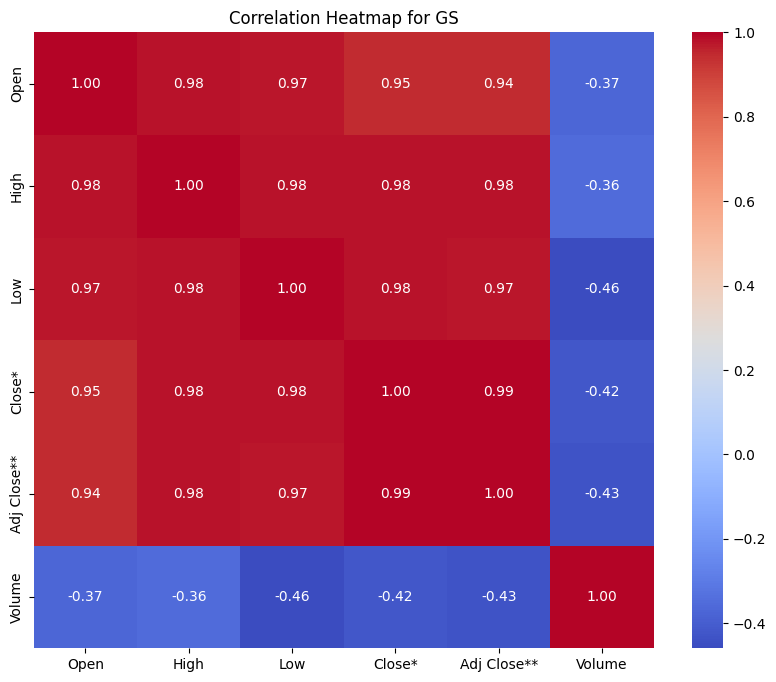

### MS

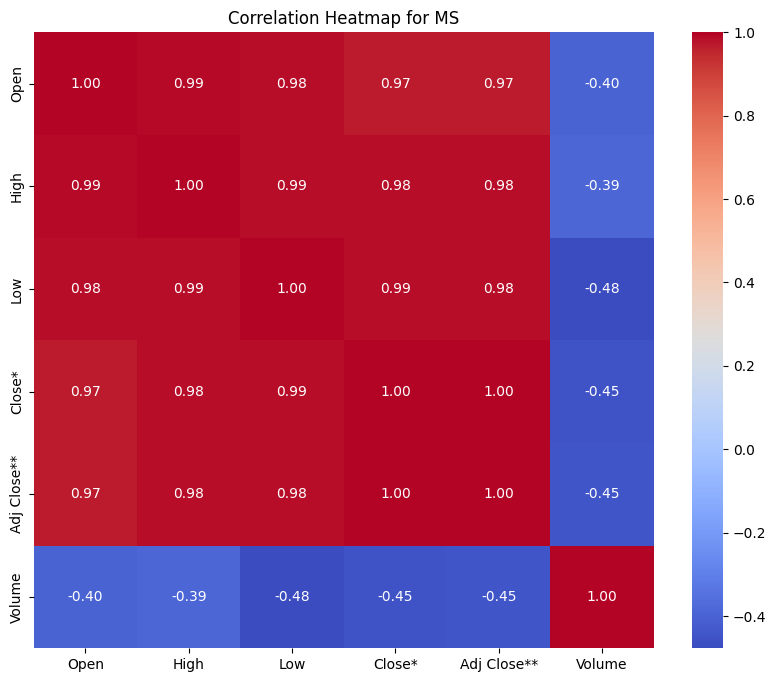

### JPM

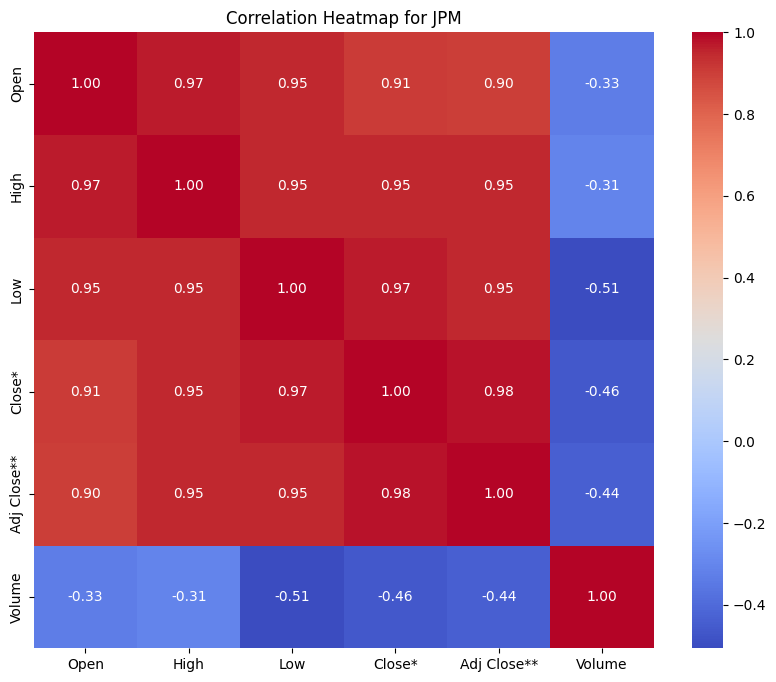

### BAC

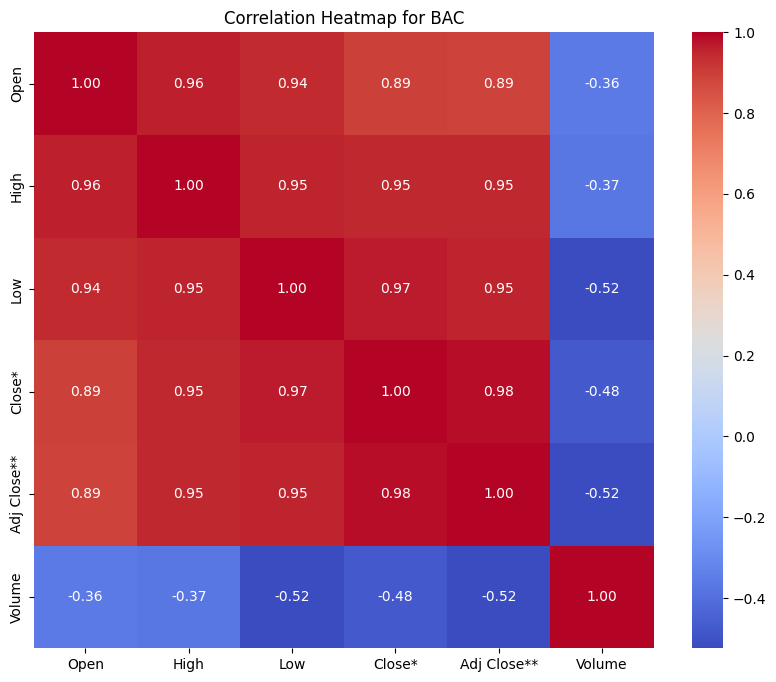

### C

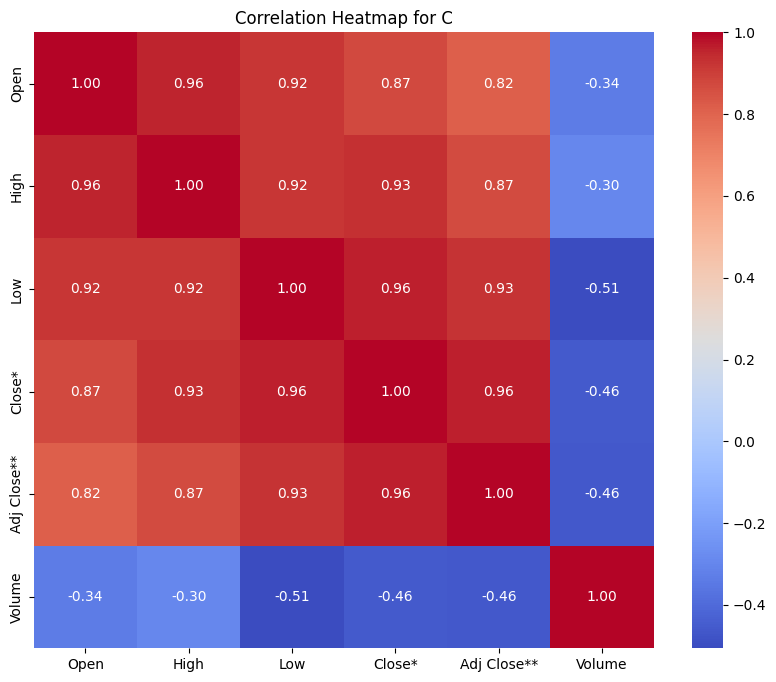

In [ ]:
for ticker in company_tickers:
    display(Markdown(f'### {ticker}'))
    plot_correlation_heatmap(ticker)

In [ ]:
# Plotting moving average based on close price
def plot_simple_moving_average(rolling_counts, data):
    for key in data.keys():
        # Create a separate subplot for each company
        fig, ax = plt.subplots(figsize=(8, 4))

        # Plot the close price for the current company
        ax.plot(data[key]['Close*'], label='Close Price')

        for rolling_count in rolling_counts:
            # Calculate and plot the Simple Moving Average
            data[key][f'SMA{rolling_count}'] = data[key]['Close*'].rolling(rolling_count).mean()
            data[key][f'SMA{rolling_count}'].dropna(inplace=True)
            ax.plot(data[key][f'SMA{rolling_count}'], label=f'{rolling_count}-Month MA')

        # Set plot title and labels
        ax.set_title(f'{key} Simple Moving Averages')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()

    # Show the plots
    plt.show()

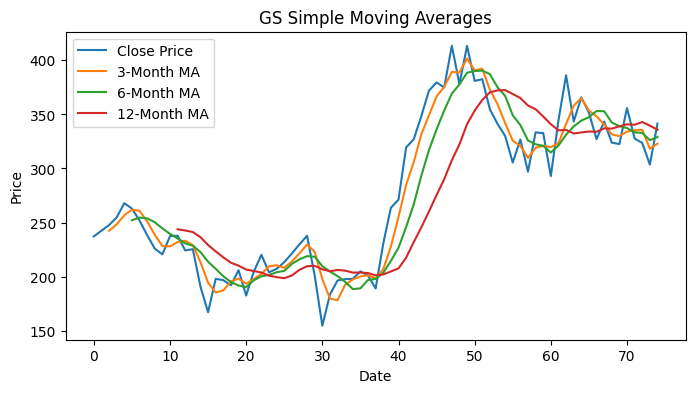

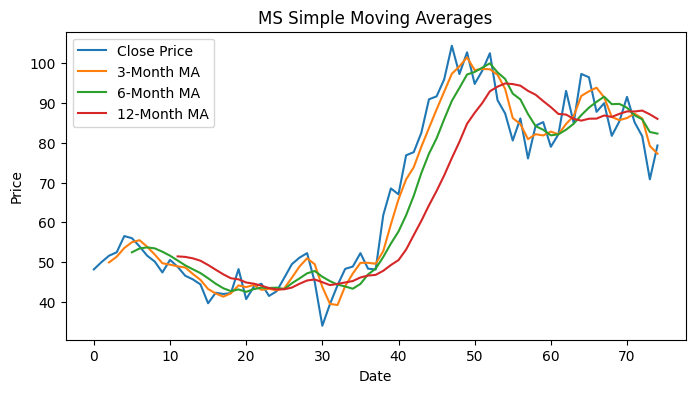

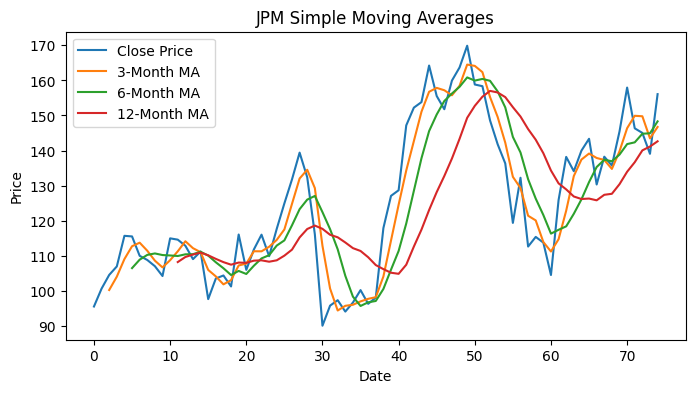

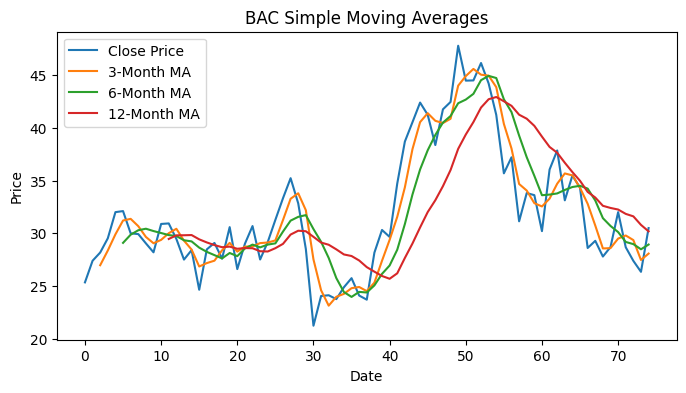

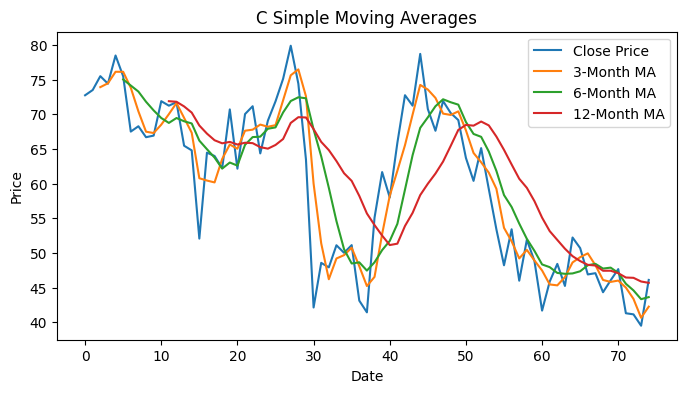

In [ ]:
import copy

moving_average_data = copy.deepcopy(clean_company_data)
plot_simple_moving_average([3, 6, 12], moving_average_data)

In [ ]:
print(clean_company_data)

{'GS':          Date    Open    High     Low  Close*  Adj Close**     Volume
0  2017-08-31  224.55  237.60  214.64  237.19       207.10   55573100
1  2017-09-30  237.20  247.08  235.19  242.48       211.72   59100600
2  2017-10-31  243.89  250.79  233.55  247.64       216.22   54376000
3  2017-12-01  249.78  262.14  244.01  254.76       223.14   53592500
4  2018-01-01  257.77  273.79  248.84  267.89       234.64   80616900
5  2018-02-01  266.15  273.12  239.29  262.93       230.29   72971300
6  2018-03-01  262.61  275.31  244.37  251.86       221.22   62342400
7  2018-03-31  251.26  262.50  237.51  238.33       209.33   76273900
8  2018-04-30  237.51  245.88  224.09  225.88       198.40   63073600
9  2018-05-31  228.40  238.23  219.12  220.57       194.42   60707000
10 2018-06-30  219.75  239.73  218.89  237.43       209.28   62274700
11 2018-07-31  238.50  245.08  226.57  237.81       209.62   58750500
12 2018-08-31  237.76  239.45  223.80  224.24       198.31   48635800
13 2018-09-30

In [ ]:
def plot_simple_moving_average_all_in_1(rolling_counts, data):
    # Create a single plot
    fig, ax = plt.subplots(figsize=(10, 6))

    for key in data.keys():
        # Plot the close price for the current company
        ax.plot(data[key]['Close*'], label=f'{key} Close Price')

        for rolling_count in rolling_counts:
            # Calculate and plot the Simple Moving Average
            data[key][f'SMA{rolling_count}'] = data[key]['Close*'].rolling(rolling_count).mean()
            data[key][f'SMA{rolling_count}'].dropna(inplace=True)
            ax.plot(data[key][f'SMA{rolling_count}'], label=f'{key} {rolling_count}-Month MA', linestyle='--')

        # Add a legend for the current company
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Company Legends')

    # Set plot title and labels
    ax.set_title('Simple Moving Averages for All Companies')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    # Show the plot
    plt.show()

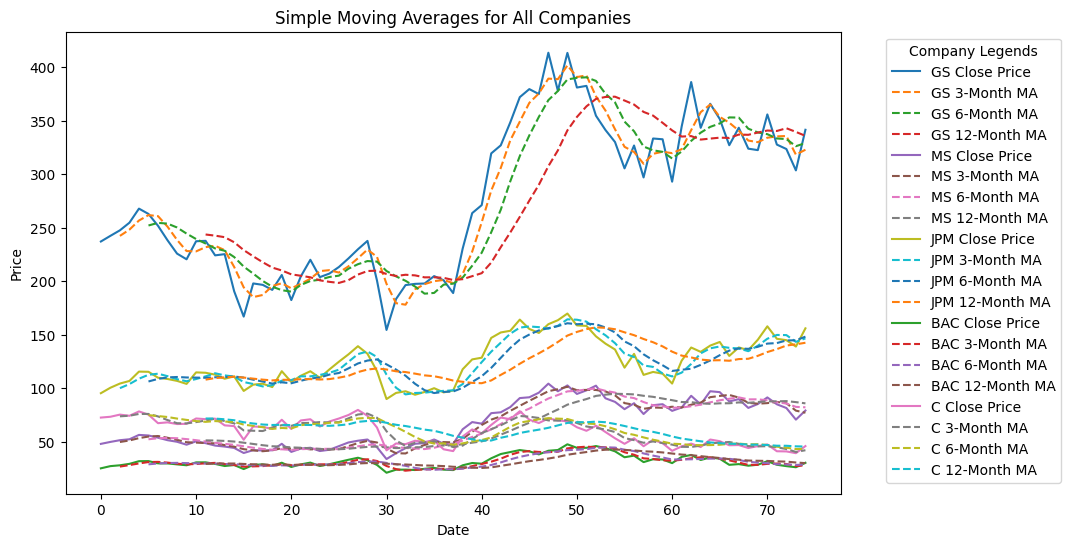

In [ ]:
plot_simple_moving_average_all_in_1([3,6,12], moving_average_data)

In [ ]:
# Plotting moving average based on close price
def plot_exponential_moving_average(rolling_counts, data):
    for key in data.keys():
        # Create a separate subplot for each company
        fig, ax = plt.subplots(figsize=(8, 4))

        # Plot the close price for the current company
        ax.plot(data[key]['Close*'], label='Close Price')

        for rolling_count in rolling_counts:
            # Calculate and plot the Simple Moving Average
            data[key][f'EMA{rolling_count}'] = data[key]['Close*'].ewm(span=rolling_count, adjust=True).mean()
            data[key][f'EMA{rolling_count}'].dropna(inplace=True)
            ax.plot(data[key][f'EMA{rolling_count}'], label=f'{rolling_count}-Month EMA')

        # Set plot title and labels
        ax.set_title(f'{key} Simple Moving Averages')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()

    # Show the plots
    plt.show()

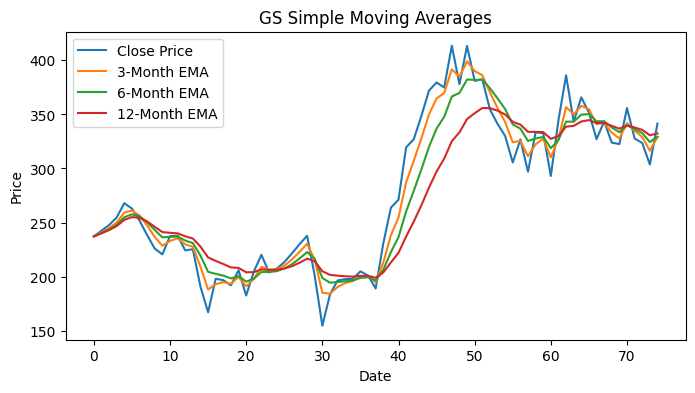

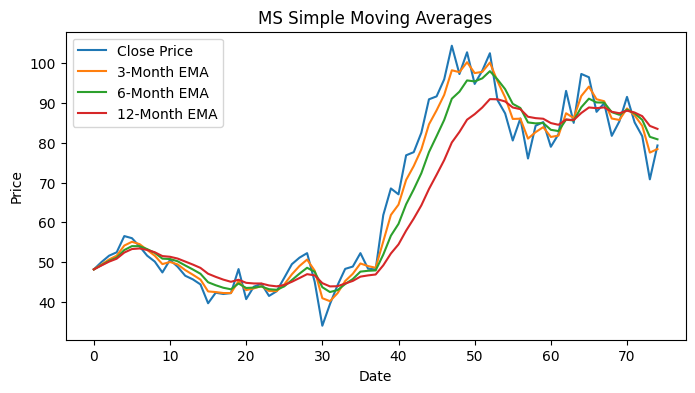

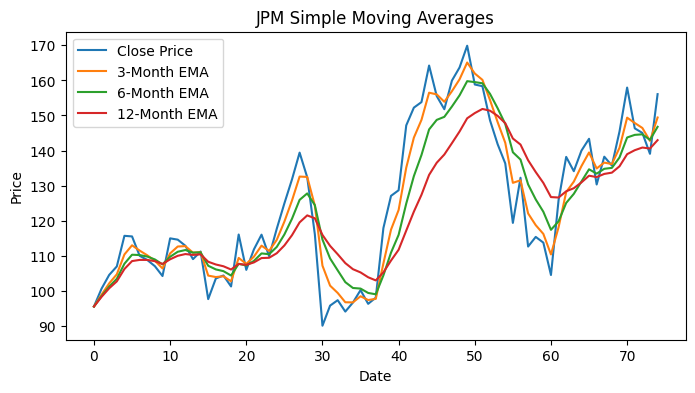

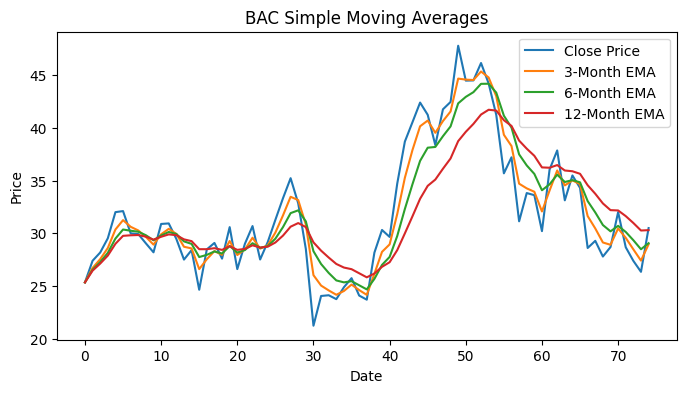

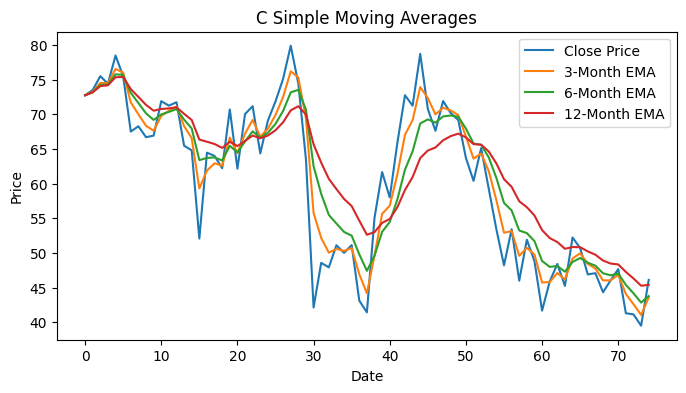

In [ ]:
plot_exponential_moving_average([3,6,12], moving_average_data)

In [ ]:
print(moving_average_data)

{'GS':          Date    Open    High     Low  Close*  Adj Close**     Volume  \
0  2017-08-31  224.55  237.60  214.64  237.19       207.10   55573100   
1  2017-09-30  237.20  247.08  235.19  242.48       211.72   59100600   
2  2017-10-31  243.89  250.79  233.55  247.64       216.22   54376000   
3  2017-12-01  249.78  262.14  244.01  254.76       223.14   53592500   
4  2018-01-01  257.77  273.79  248.84  267.89       234.64   80616900   
5  2018-02-01  266.15  273.12  239.29  262.93       230.29   72971300   
6  2018-03-01  262.61  275.31  244.37  251.86       221.22   62342400   
7  2018-03-31  251.26  262.50  237.51  238.33       209.33   76273900   
8  2018-04-30  237.51  245.88  224.09  225.88       198.40   63073600   
9  2018-05-31  228.40  238.23  219.12  220.57       194.42   60707000   
10 2018-06-30  219.75  239.73  218.89  237.43       209.28   62274700   
11 2018-07-31  238.50  245.08  226.57  237.81       209.62   58750500   
12 2018-08-31  237.76  239.45  223.80  224.2

Processing GS


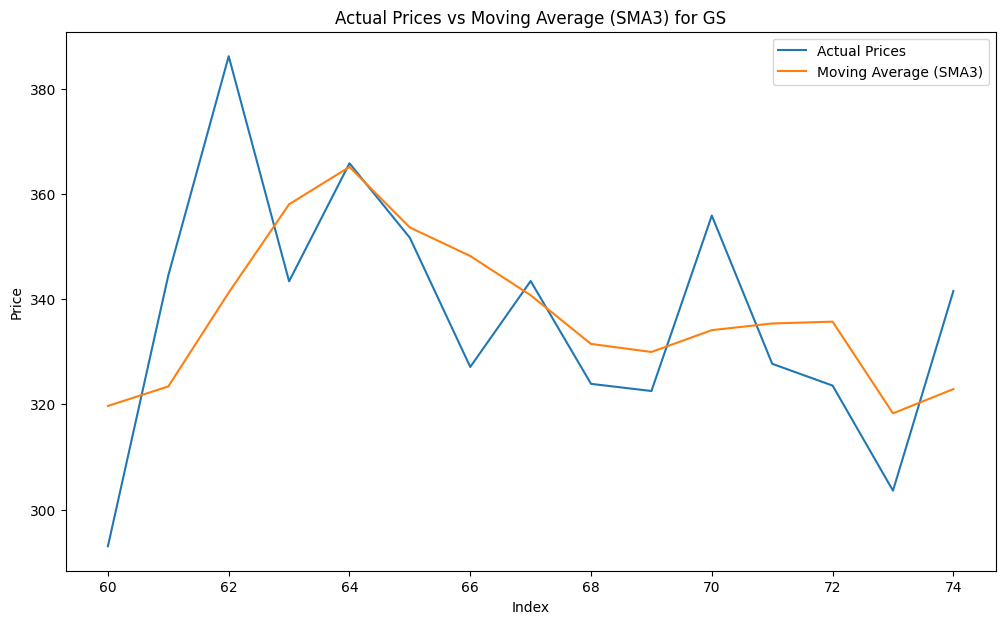

Processing MS


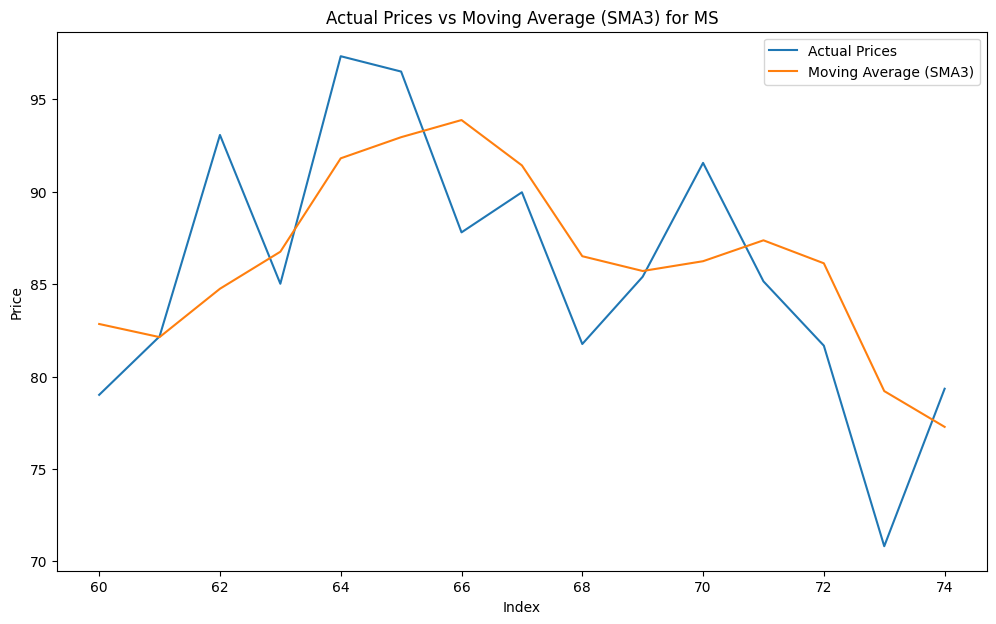

Processing JPM


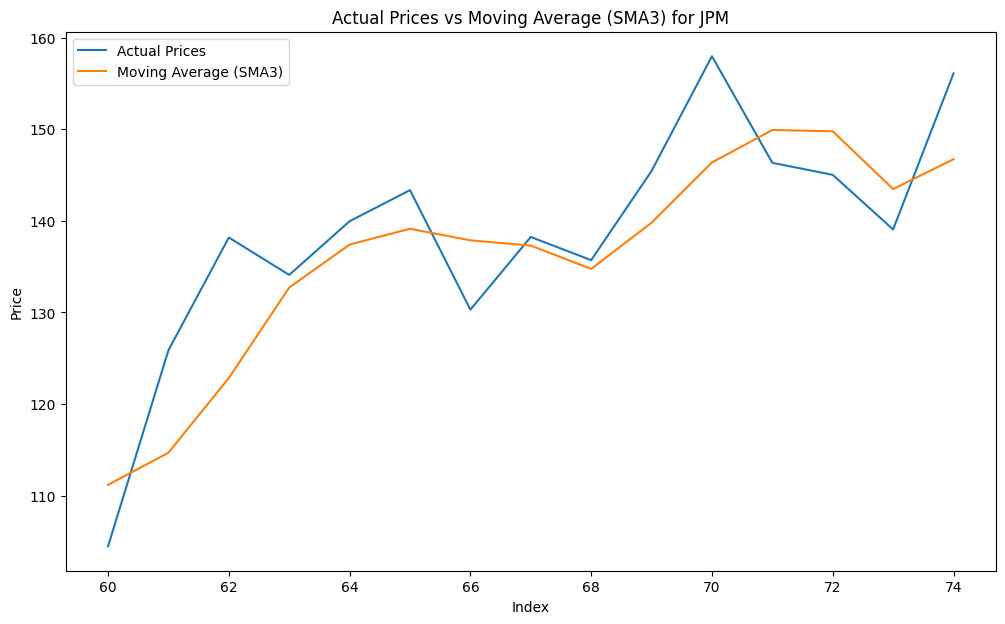

Processing BAC


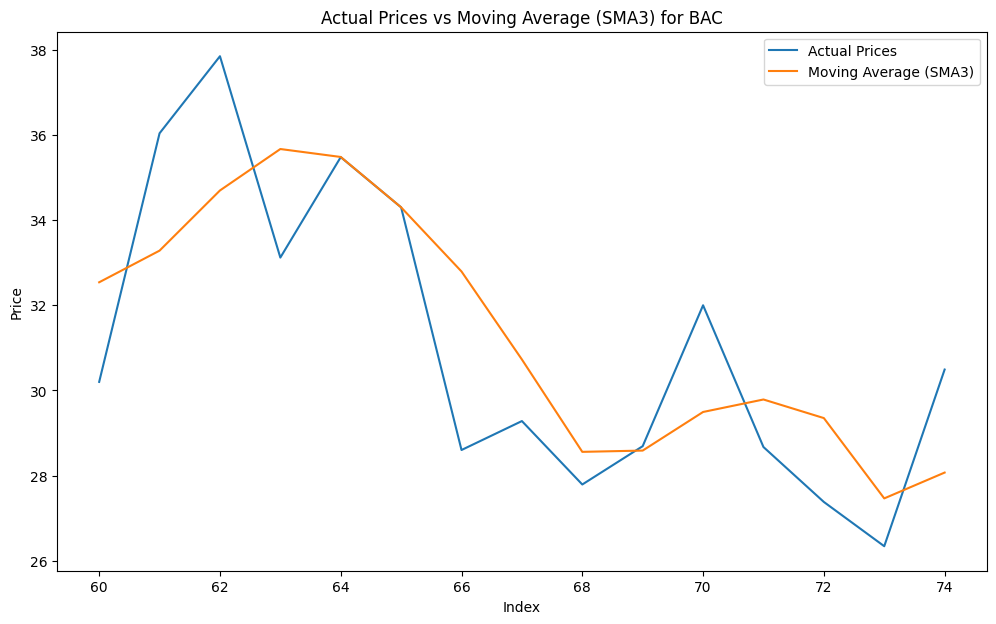

Processing C


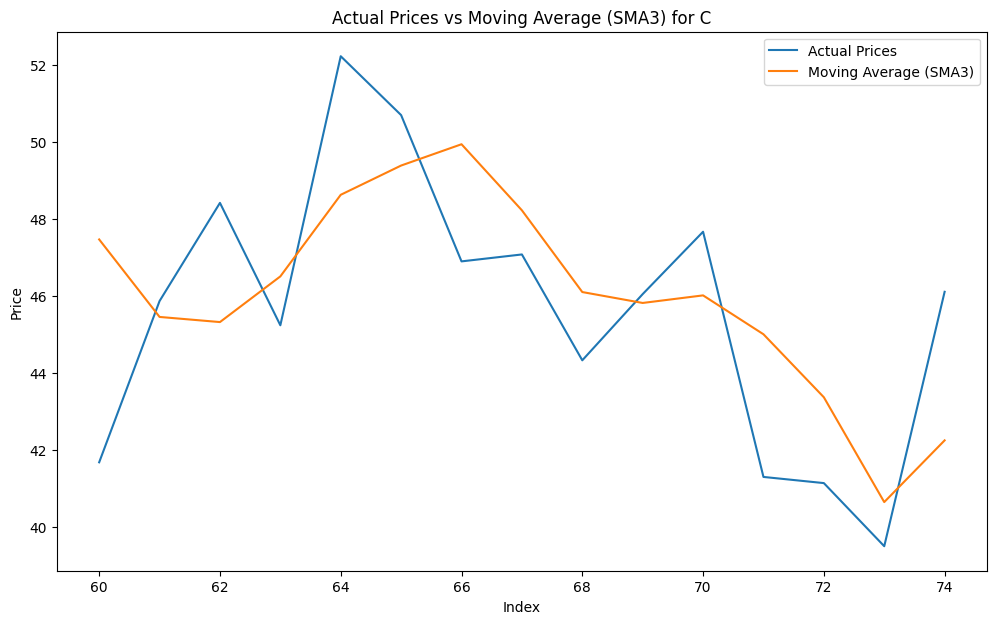

In [ ]:
ticker_symbols = ['GS', 'MS', 'JPM', 'BAC', 'C']
RMSE = []
MAE = []
R_SQUARED = []

for ticker_symbol in ticker_symbols:
    print(f'Processing {ticker_symbol}')

    data = moving_average_data[ticker_symbol].drop(['Date', 'Close*', 'Adj Close**'], axis=1)

    plt.figure(figsize=(12, 7))

    index_values = moving_average_data[ticker_symbol].index[60:]  # Use index instead of Date
    plt.plot(index_values, moving_average_data[ticker_symbol]['Close*'][60:], label='Actual Prices')
    plt.plot(index_values, moving_average_data[ticker_symbol]['SMA3'][60:], label='Moving Average (SMA3)')

    rmse = sqrt(mean_squared_error(moving_average_data[ticker_symbol]['Close*'][60:], moving_average_data[ticker_symbol]['SMA3'][60:]))
    mae = mean_absolute_error(moving_average_data[ticker_symbol]['Close*'][60:], moving_average_data[ticker_symbol]['SMA3'][60:])
    r_squared = r2_score(moving_average_data[ticker_symbol]['Close*'][60:], moving_average_data[ticker_symbol]['SMA3'][60:])
    RMSE.append(rmse)
    MAE.append(mae)
    R_SQUARED.append(r_squared)

    plt.title(f'Actual Prices vs Moving Average (SMA3) for {ticker_symbol}')
    plt.xlabel('Index')  # Set xlabel to 'Index'
    plt.ylabel('Price')
    plt.legend()
    plt.show()


In [ ]:
results_df = pd.DataFrame({'Ticker Symbol': ticker_symbols, 'RMSE': RMSE, 'MAE': MAE, 'R-SQUARED': R_SQUARED})
print(results_df.to_markdown(index=False))

| Ticker Symbol   |     RMSE |      MAE |   R-SQUARED |
|:----------------|---------:|---------:|------------:|
| GS              | 18.6163  | 14.9098  |    0.330712 |
| MS              |  4.61539 |  3.86933 |    0.552997 |
| JPM             |  7.29578 |  6.00889 |    0.649027 |
| BAC             |  2.13426 |  1.76333 |    0.607742 |
| C               |  2.72039 |  2.28467 |    0.380942 |


## Comparative Stock Performance Analysis

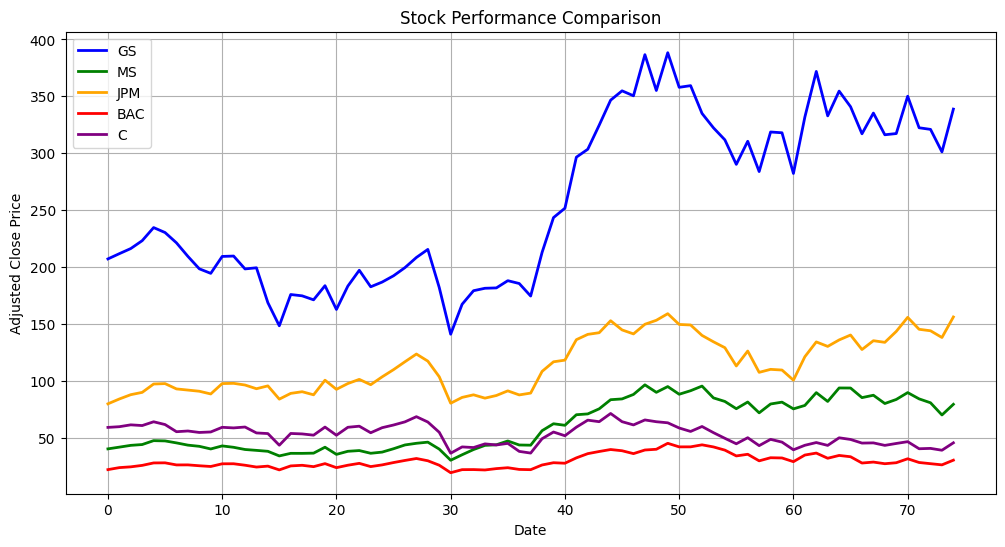

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Define a color map for the lines
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, ticker in enumerate(clean_company_data.keys()):
    plt.plot(
        clean_company_data[ticker].index,
        clean_company_data[ticker]['Adj Close**'],
        label=ticker,
        color=colors[i],  # Assign a unique color to each stock
        linestyle='-',    # You can change the line style if needed
        linewidth=2        # Adjust the line width for better visibility
    )

plt.title('Stock Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Volatility Analysis

In [ ]:
import copy

volatility_data = copy.deepcopy(clean_company_data)

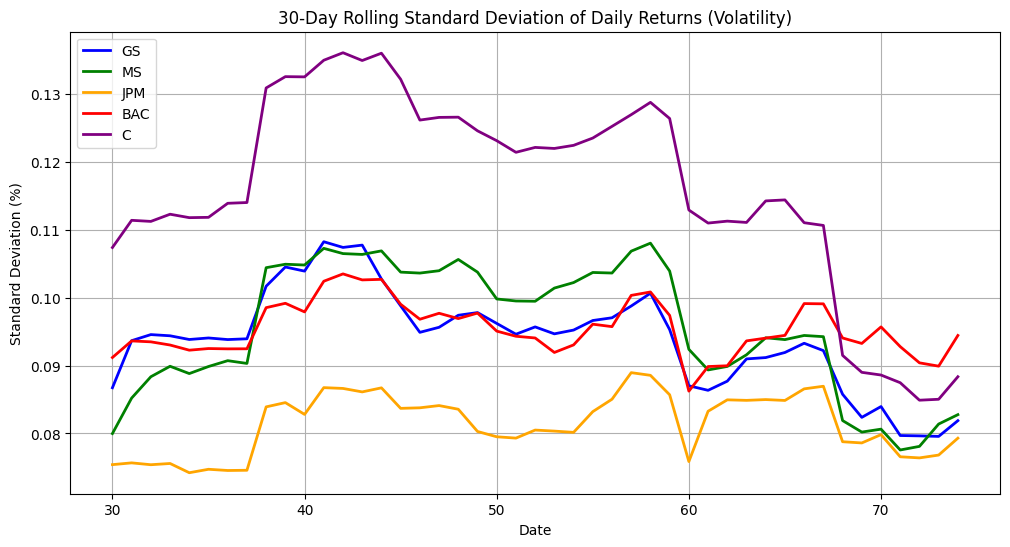

In [ ]:
import matplotlib.pyplot as plt

# Calculate daily returns for each stock
for ticker in volatility_data.keys():
    volatility_data[ticker]['Daily Return'] = volatility_data[ticker]['Adj Close**'].pct_change()

plt.figure(figsize=(12, 6))

# Define a color map for the lines
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, ticker in enumerate(volatility_data.keys()):
    plt.plot(
        volatility_data[ticker].index,
        volatility_data[ticker]['Daily Return'].rolling(window=30).std(),
        label=ticker,
        color=colors[i],
        linestyle='-',
        linewidth=2
    )

plt.title('30-Day Rolling Standard Deviation of Daily Returns (Volatility)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (%)')  # Format y-axis as percentage
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Financial Health (Annual data)

In [ ]:
# We tried to solve the Financial Health but it was impossible to solve it. However we spend so much time for the problem so we want to leave it here.
# ticker = 'GS'

# # we dont need this part because we already have it but it was just easier for me.
# balance_sheet = clean_financial_data[ticker]['annual_balance_sheet']
# income_statement = clean_financial_data[ticker]['annual_income_statement']
# cash_flow = clean_financial_data[ticker]['annual_cash_flow']

# #Current Ratio
# #current_ratio = balance_sheet.loc['Total Current Assets'] / balance_sheet.loc['Total Current Liabilities']
# #Quick Ratio
# #quick_ratio = (balance_sheet.loc['Total Current Assets'] - balance_sheet.loc['Inventory']) / balance_sheet.loc['Total Current Liabilities']
# #D/E ratio (Debt to Equity ratio)
# #debt_to_equity_ratio = balance_sheet.loc['Total Liab'] / balance_sheet.loc['Total Stockholder Equity']
# #Trend Analysis
# # Assuming the data includes a 'Year' column and the relevant financial data
# #income_statement['Year'] = pd.to_datetime(income_statement['Year'])
# #trend_analysis = income_statement.set_index('Year')[['Total Revenue', 'Net Income']]

# trend_analysis = income_statement[['Total Revenue', 'Net Income']]
# # Margin Analysis
# income_statement['Gross Margin'] = income_statement['Gross Profit'] / income_statement['Total Revenue']
# income_statement['Operating Margin'] = income_statement['Operating Income'] / income_statement['Total Revenue']
# income_statement['Net Profit Margin'] = income_statement['Net Income'] / income_statement['Total Revenue']
# #Capital Expenditure Analysis
# # Capital Expenditure is usually a negative number in the Cash Flow statement, often listed as 'Capital Expenditures'
# cash_flow['Capital Expenditure'] = -cash_flow['Capital Expenditures']
# capex_analysis = cash_flow[['Year', 'Capital Expenditure']].set_index('Year')
# # Investment Analysis
# # Assuming you provide a 'Current Stock Price' variable
# current_stock_price = 100  # placeholder for the current stock price
# latest_earnings = income_statement[income_statement['Year'] == income_statement['Year'].max()]['Net Income'].iloc[0]
# total_shares = balance_sheet[balance_sheet['Year'] == balance_sheet['Year'].max()]['Total Common Shares Outstanding'].iloc[0]
# earnings_per_share = latest_earnings / total_shares
# pe_ratio = current_stock_price / earnings_per_share
# #Net Porfit Margin
# net_profit_margin = income_statement.loc['Net Income'] / income_statement.loc['Total Revenue']
# # ROE (Return on Equity)
# roe = income_statement.loc['Net Income'] / balance_sheet.loc['Total Stockholder Equity']
# # EPS (Earning per Share)
# eps = income_statement.loc['Net Income'] / income_statement.loc['Weighted Average Shs Out']

# ratios = pd.DataFrame({

#     'Net Profit Margin': net_profit_margin,
#     'Return on Equity': roe,
#     'Earnings Per Share': eps
# })

# print(ratios)

### Predictive Modeling (predicting in 30 days)

In [ ]:
ticker_symbol = 'GS'

In [ ]:
data = clean_company_data[ticker_symbol].drop(['Date', 'Close*', 'Adj Close**'], axis=1)
training_x, testing_x , training_y, testing_y = train_test_split(data, clean_company_data[ticker_symbol]['Close*'], test_size=0.20,shuffle = False)
display(Markdown(f'### Training'))
print(training_x)
display(Markdown(f'### Testing'))
print(testing_x)


### Training

      Open    High     Low     Volume
0   224.55  237.60  214.64   55573100
1   237.20  247.08  235.19   59100600
2   243.89  250.79  233.55   54376000
3   249.78  262.14  244.01   53592500
4   257.77  273.79  248.84   80616900
5   266.15  273.12  239.29   72971300
6   262.61  275.31  244.37   62342400
7   251.26  262.50  237.51   76273900
8   237.51  245.88  224.09   63073600
9   228.40  238.23  219.12   60707000
10  219.75  239.73  218.89   62274700
11  238.50  245.08  226.57   58750500
12  237.76  239.45  223.80   48635800
13  226.22  231.40  208.40   79100600
14  225.76  234.06  188.12   84619000
15  194.00  195.66  151.70   99800200
16  164.33  203.29  163.35   89708600
17  198.00  201.50  188.22   49619100
18  198.75  206.45  186.50   62988100
19  194.00  209.97  193.61   63471300
20  206.40  208.75  182.31   51152900
21  181.70  205.84  180.73   44089700
22  208.00  222.24  203.54   51995900
23  219.35  219.95  193.71   43352400
24  201.10  221.50  196.58   45995700
25  207.01  

### Testing

      Open    High     Low    Volume
60  329.87  344.37  288.62  40946400
61  297.17  346.18  287.75  50063200
62  345.13  389.58  342.59  54123100
63  386.50  386.50  339.30  42481000
64  345.50  374.35  336.16  72602300
65  359.10  379.68  351.33  43626100
66  349.39  358.86  301.87  71663200
67  326.14  345.06  319.37  41874400
68  344.05  347.46  317.32  40051700
69  324.51  347.73  310.56  54489500
70  322.41  361.62  312.70  53389200
71  354.00  358.73  318.00  39255100
72  329.67  346.19  318.98  34247000
73  322.03  323.58  289.36  49100700
74  303.33  344.76  302.84  41299000


Processing ['GS', 'MS', 'JPM', 'BAC', 'C']
     Open    High     Low    Volume
0  224.55  237.60  214.64  55573100
1  237.20  247.08  235.19  59100600
2  243.89  250.79  233.55  54376000
3  249.78  262.14  244.01  53592500
4  257.77  273.79  248.84  80616900
      Open    High     Low    Volume
60  329.87  344.37  288.62  40946400
61  297.17  346.18  287.75  50063200
62  345.13  389.58  342.59  54123100
63  386.50  386.50  339.30  42481000
64  345.50  374.35  336.16  72602300
Test RMSE for GS: 10.335948070334636


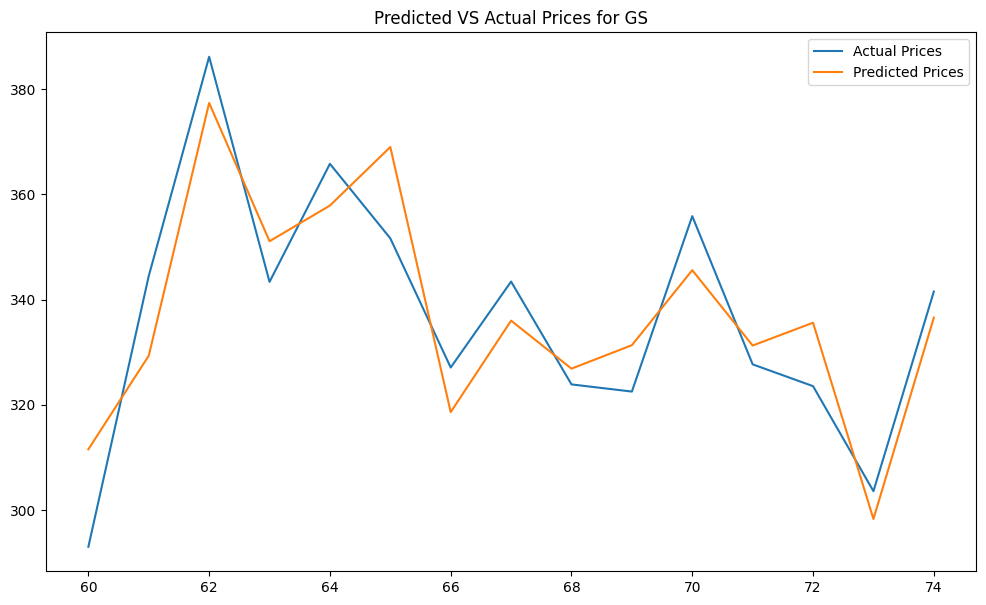

Processing ['GS', 'MS', 'JPM', 'BAC', 'C']
    Open   High    Low     Volume
0  45.59  48.49  43.84  157535900
1  48.11  51.52  47.70  181652600
2  50.22  52.58  47.42  142338300
3  51.88  54.25  50.72  156160300
4  52.76  58.05  51.92  197035500
     Open   High    Low     Volume
60  84.67  91.04  78.35  182851600
61  80.05  84.74  74.67  171004200
62  83.25  93.25  82.55  131117900
63  93.06  95.16  84.06  145897300
64  85.64  99.10  84.83  168742800
Test RMSE for MS: 2.5033662955215195


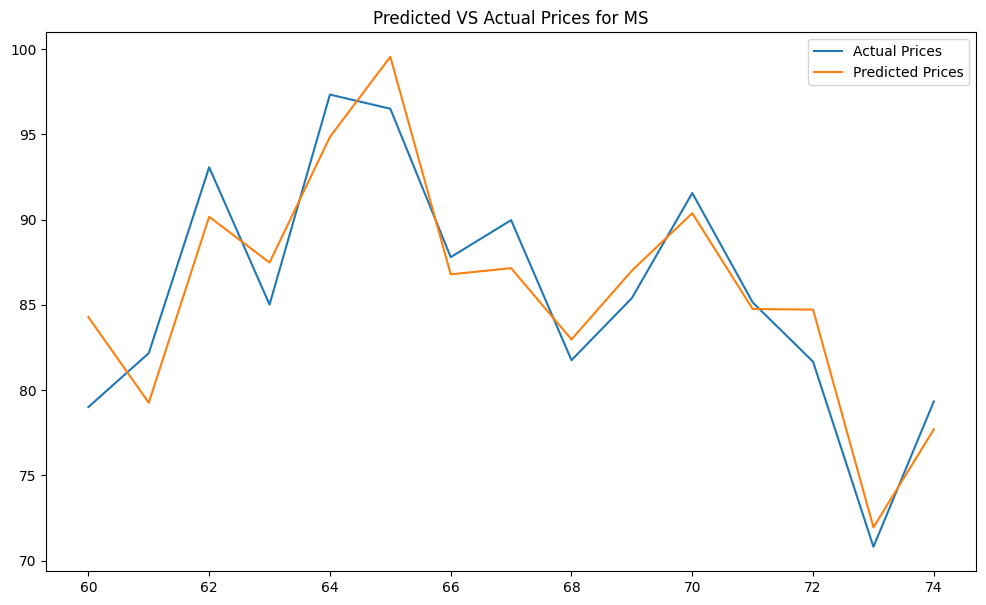

Processing ['GS', 'MS', 'JPM', 'BAC', 'C']
     Open    High     Low     Volume
0   91.25   95.88   88.08  250922800
1   95.77  102.42   94.96  259433200
2  101.10  106.66   95.95  256086400
3  104.90  108.46  102.20  284432100
4  107.63  117.35  106.81  304940100
      Open    High     Low     Volume
60  113.29  121.55  104.40  248558100
61  105.62  127.43  101.28  318197200
62  126.87  138.18  125.91  227228500
63  138.18  138.66  128.41  202046000
64  135.24  143.49  133.55  209965200
Test RMSE for JPM: 4.226619981006441


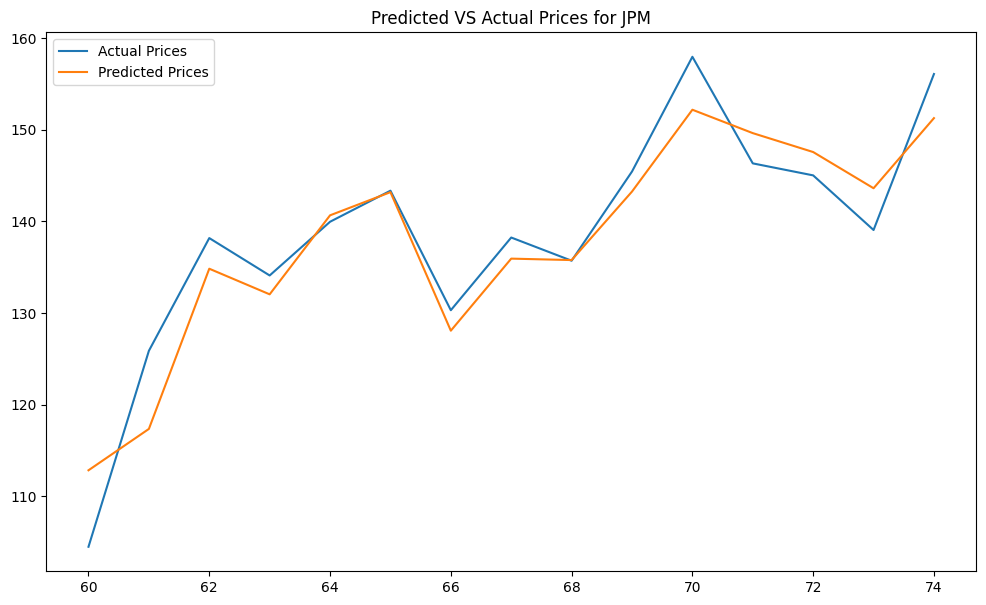

Processing ['GS', 'MS', 'JPM', 'BAC', 'C']
    Open   High    Low      Volume
0  23.90  25.64  22.75  1481992500
1  25.46  27.98  25.12  1380163100
2  27.64  28.72  25.81  1350989400
3  28.25  30.03  27.50  1494582400
4  29.75  32.45  29.61  1413714500
     Open   High    Low     Volume
60  33.34  35.63  30.17  860183900
61  30.59  36.37  29.31  980931500
62  36.44  38.60  35.41  700345500
63  37.50  37.69  31.35  893060200
64  33.23  35.78  32.89  809281100
Test RMSE for BAC: 1.0485061073869808


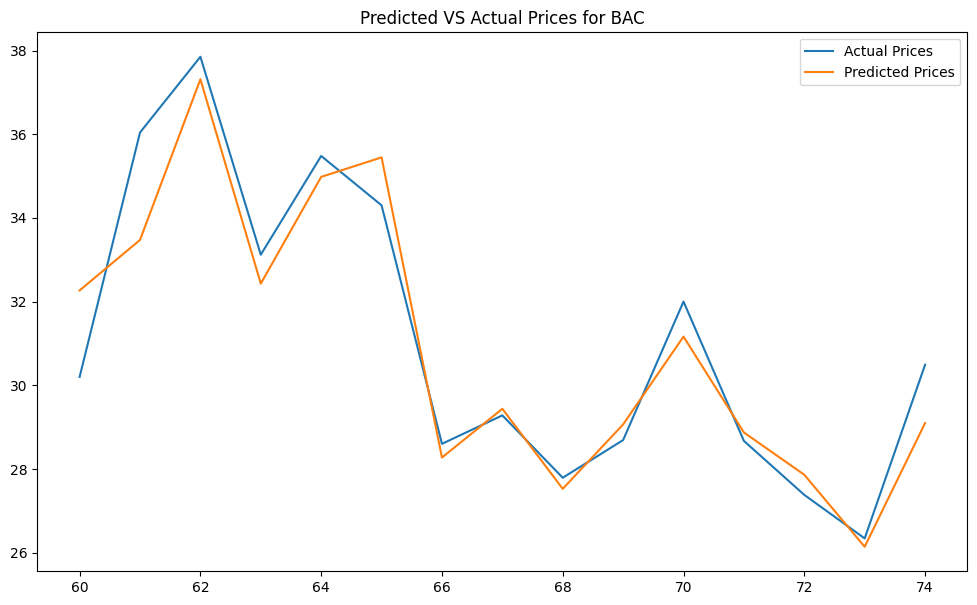

Processing ['GS', 'MS', 'JPM', 'BAC', 'C']
    Open   High    Low     Volume
0  68.11  72.97  65.69  299867700
1  73.07  76.14  70.91  360485700
2  73.99  76.89  70.02  289638400
3  75.71  77.92  73.78  335091300
4  75.09  80.70  73.97  333288100
     Open   High    Low     Volume
60  48.77  51.64  41.61  403082700
61  41.55  46.28  40.01  392842200
62  46.30  50.57  44.27  353073000
63  48.28  48.67  42.91  381563700
64  45.75  52.29  45.54  381928500
Test RMSE for C: 1.9058793048425844


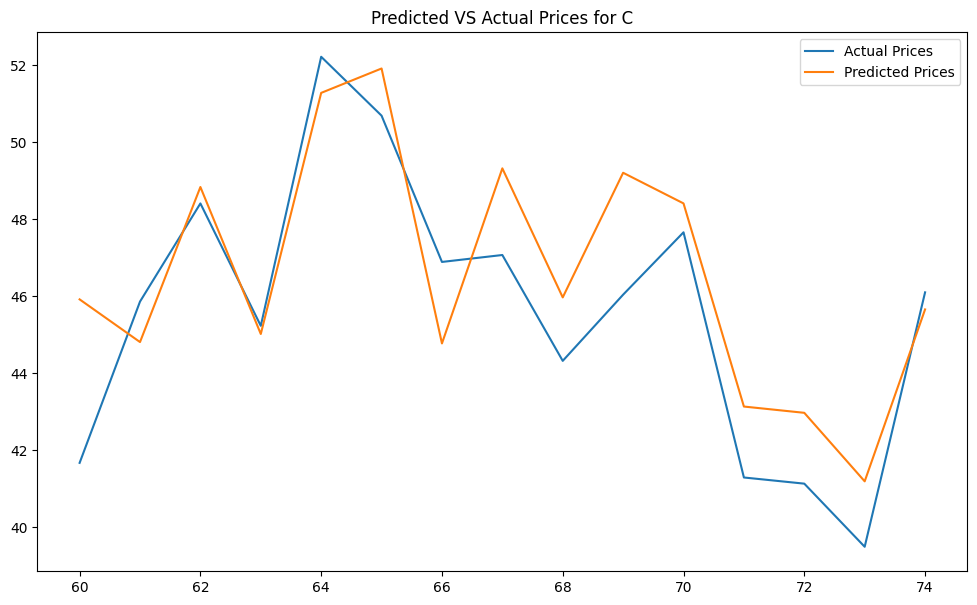

In [ ]:
ticker_symbols = ['GS', 'MS', 'JPM', 'BAC', 'C']
RMSE = []
MAE = []
R_SQUARED = []
for ticker_symbol in ticker_symbols:
    print(f'Processing {ticker_symbols}')
    data = clean_company_data[ticker_symbol].drop(['Date', 'Close*', 'Adj Close**'], axis=1)
    training_x, testing_x , training_y, testing_y = train_test_split(
        data, clean_company_data[ticker_symbol]['Close*'], test_size=0.20,shuffle = False
    )
    print(training_x.head())
    print(testing_x.head())
    model = LinearRegression()
    model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    rmse = sqrt(mean_squared_error(testing_y, predictions))
    mae = mean_absolute_error(testing_y, predictions)
    r_squared = r2_score(testing_y, predictions)
    RMSE.append(rmse)
    MAE.append(mae)
    R_SQUARED.append(r_squared)
    print(f"Test RMSE for {ticker_symbol}: {rmse}")
    print(f"Test MAE for {ticker_symbol}: {mae}")
    print(f"Test R-SQUARED for {ticker_symbol}: {r_squared}")

    plt.figure(figsize=(12,7))
    plt.plot(testing_y.index, testing_y, label='Actual Prices')
    plt.plot(testing_y.index, predictions, label='Predicted Prices')
    plt.title(f'Predicted VS Actual Prices for {ticker_symbol}')
    plt.legend()
    plt.show()

In [ ]:
results_df = pd.DataFrame({'Ticker Symbol': ticker_symbols, 'RMSE': RMSE, 'MAE': MAE, 'R-SQUARED': R_SQUARED})
print(results_df.to_markdown(index=False))

| Ticker Symbol   |     RMSE |      MAE |   R-SQUARED |
|:----------------|---------:|---------:|------------:|
| GS              | 10.3359  | 9.28517  |    0.793687 |
| MS              |  2.50337 | 2.20785  |    0.868495 |
| JPM             |  4.22662 | 3.39448  |    0.882208 |
| BAC             |  1.04851 | 0.783165 |    0.905328 |
| C               |  1.90588 | 1.59086  |    0.69615  |
